In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from metrics import *
from neal_batched import *
from neal_sequential import *
from sequential import *
from batched import *
from sbm_class import *

# Evidence of convergence to the prior

**Possibly not necessary:** show how a bad initialization affects the convergence (it shows where we got the intuition of the "convergence to the prior")

In [2]:
np.random.seed(0)

Network parameters

In [3]:
p = 0.17
q = 0.08
n = 400
k = 4
n_k = n/k
T = 500
burn_in = 0

I = -2 * np.log((p*q)**0.5 +((1-p)* (1-q))**0.5 )
theoretical_threshold = np.exp(-n*I / k) # for later use

True balanced assignment

In [4]:
# generate the network
sbm = Homogeneous_SBM(n, k, p, q, Neal=False)
A = sbm.get_A()
z_true = sbm.get_z()

In [5]:
n_values = 11 # number of values of the mesh of alpha_values
r = 25 # number of iterations for each value of alpha in the mesh
steps = 20 #iterations of the batched sampler
upper_alpha = 0.4

alpha_values = np.linspace(0, 0.5, n_values, dtype=float)
alpha_values 

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [5]:
alpha_p_pri = 1
beta_p_pri = 1  

alpha_q_pri = 1
beta_q_pri = 1
pi_pri = np.ones((n,k)) / k # uniform prior

In [7]:
p_list = np.zeros((len(alpha_values), r, steps))
q_list = np.zeros((len(alpha_values), r, steps))
loss_list_batched =  np.zeros((len(alpha_values), r, steps))

for a in range(len(alpha_values)):
    alpha = alpha_values[a]

    print("\nCurrent alpha: ", alpha)
    # initialize the sampler
    z_0 = warm_initializer(z_true, alpha, n ,k)

    # start the different runs
    for run in range(r):
        print("Current (alpha, iteration): ", (alpha, run))
        # run the batched sampler
        
        batched = batched_Gibbs_sampler(A, z_0,
                                            alpha_p_pri, beta_p_pri, 
                                            alpha_q_pri, beta_q_pri, 
                                            pi_pri
                                            )
        batched.run(steps, burn_in = 0)
        z_list_batched = batched.get_z_list()
        losses_batched = [loss(z_true, z_list_batched[i])[0] for i in range(steps)]
        loss_list_batched[a, run, :] = losses_batched
        p_list[a, run, :] = batched.get_p_list()
        q_list[a, run, :] = batched.get_q_list()


Current alpha:  0.0
Current (alpha, iteration):  (0.0, 0)


100%|██████████| 20/20 [00:00<00:00, 118.21it/s]


Current (alpha, iteration):  (0.0, 1)


100%|██████████| 20/20 [00:00<00:00, 125.51it/s]


Current (alpha, iteration):  (0.0, 2)


100%|██████████| 20/20 [00:00<00:00, 101.81it/s]


Current (alpha, iteration):  (0.0, 3)


100%|██████████| 20/20 [00:00<00:00, 99.91it/s]


Current (alpha, iteration):  (0.0, 4)


100%|██████████| 20/20 [00:00<00:00, 76.10it/s]


Current (alpha, iteration):  (0.0, 5)


100%|██████████| 20/20 [00:00<00:00, 100.17it/s]


Current (alpha, iteration):  (0.0, 6)


100%|██████████| 20/20 [00:00<00:00, 99.74it/s]


Current (alpha, iteration):  (0.0, 7)


100%|██████████| 20/20 [00:00<00:00, 118.11it/s]


Current (alpha, iteration):  (0.0, 8)


100%|██████████| 20/20 [00:00<00:00, 98.13it/s] 


Current (alpha, iteration):  (0.0, 9)


100%|██████████| 20/20 [00:00<00:00, 100.21it/s]


Current (alpha, iteration):  (0.0, 10)


100%|██████████| 20/20 [00:00<00:00, 81.73it/s]


Current (alpha, iteration):  (0.0, 11)


100%|██████████| 20/20 [00:00<00:00, 110.62it/s]


Current (alpha, iteration):  (0.0, 12)


100%|██████████| 20/20 [00:00<00:00, 109.98it/s]


Current (alpha, iteration):  (0.0, 13)


100%|██████████| 20/20 [00:00<00:00, 106.66it/s]


Current (alpha, iteration):  (0.0, 14)


100%|██████████| 20/20 [00:00<00:00, 112.24it/s]


Current (alpha, iteration):  (0.0, 15)


100%|██████████| 20/20 [00:00<00:00, 102.69it/s]


Current (alpha, iteration):  (0.0, 16)


100%|██████████| 20/20 [00:00<00:00, 104.71it/s]


Current (alpha, iteration):  (0.0, 17)


100%|██████████| 20/20 [00:00<00:00, 75.46it/s]


Current (alpha, iteration):  (0.0, 18)


100%|██████████| 20/20 [00:00<00:00, 99.74it/s]


Current (alpha, iteration):  (0.0, 19)


100%|██████████| 20/20 [00:00<00:00, 96.97it/s]


Current (alpha, iteration):  (0.0, 20)


100%|██████████| 20/20 [00:00<00:00, 113.68it/s]


Current (alpha, iteration):  (0.0, 21)


100%|██████████| 20/20 [00:00<00:00, 118.47it/s]


Current (alpha, iteration):  (0.0, 22)


100%|██████████| 20/20 [00:00<00:00, 119.91it/s]


Current (alpha, iteration):  (0.0, 23)


100%|██████████| 20/20 [00:00<00:00, 127.46it/s]


Current (alpha, iteration):  (0.0, 24)


100%|██████████| 20/20 [00:00<00:00, 109.96it/s]



Current alpha:  0.05
Current (alpha, iteration):  (0.05, 0)


100%|██████████| 20/20 [00:00<00:00, 125.67it/s]


Current (alpha, iteration):  (0.05, 1)


100%|██████████| 20/20 [00:00<00:00, 116.33it/s]


Current (alpha, iteration):  (0.05, 2)


100%|██████████| 20/20 [00:00<00:00, 108.19it/s]


Current (alpha, iteration):  (0.05, 3)


100%|██████████| 20/20 [00:00<00:00, 96.00it/s]


Current (alpha, iteration):  (0.05, 4)


100%|██████████| 20/20 [00:00<00:00, 114.93it/s]


Current (alpha, iteration):  (0.05, 5)


100%|██████████| 20/20 [00:00<00:00, 103.70it/s]


Current (alpha, iteration):  (0.05, 6)


100%|██████████| 20/20 [00:00<00:00, 86.78it/s]


Current (alpha, iteration):  (0.05, 7)


100%|██████████| 20/20 [00:00<00:00, 100.31it/s]


Current (alpha, iteration):  (0.05, 8)


100%|██████████| 20/20 [00:00<00:00, 92.41it/s]


Current (alpha, iteration):  (0.05, 9)


100%|██████████| 20/20 [00:00<00:00, 99.82it/s]


Current (alpha, iteration):  (0.05, 10)


100%|██████████| 20/20 [00:00<00:00, 99.97it/s]


Current (alpha, iteration):  (0.05, 11)


100%|██████████| 20/20 [00:00<00:00, 106.26it/s]


Current (alpha, iteration):  (0.05, 12)


100%|██████████| 20/20 [00:00<00:00, 108.42it/s]


Current (alpha, iteration):  (0.05, 13)


100%|██████████| 20/20 [00:00<00:00, 94.71it/s]


Current (alpha, iteration):  (0.05, 14)


100%|██████████| 20/20 [00:00<00:00, 120.76it/s]


Current (alpha, iteration):  (0.05, 15)


100%|██████████| 20/20 [00:00<00:00, 119.26it/s]


Current (alpha, iteration):  (0.05, 16)


100%|██████████| 20/20 [00:00<00:00, 126.02it/s]


Current (alpha, iteration):  (0.05, 17)


100%|██████████| 20/20 [00:00<00:00, 122.58it/s]


Current (alpha, iteration):  (0.05, 18)


100%|██████████| 20/20 [00:00<00:00, 116.03it/s]


Current (alpha, iteration):  (0.05, 19)


100%|██████████| 20/20 [00:00<00:00, 83.17it/s]


Current (alpha, iteration):  (0.05, 20)


100%|██████████| 20/20 [00:00<00:00, 102.58it/s]


Current (alpha, iteration):  (0.05, 21)


100%|██████████| 20/20 [00:00<00:00, 108.23it/s]


Current (alpha, iteration):  (0.05, 22)


100%|██████████| 20/20 [00:00<00:00, 100.45it/s]


Current (alpha, iteration):  (0.05, 23)


100%|██████████| 20/20 [00:00<00:00, 112.98it/s]


Current (alpha, iteration):  (0.05, 24)


100%|██████████| 20/20 [00:00<00:00, 101.68it/s]



Current alpha:  0.1
Current (alpha, iteration):  (0.1, 0)


100%|██████████| 20/20 [00:00<00:00, 79.73it/s]


Current (alpha, iteration):  (0.1, 1)


100%|██████████| 20/20 [00:00<00:00, 100.71it/s]


Current (alpha, iteration):  (0.1, 2)


100%|██████████| 20/20 [00:00<00:00, 99.67it/s]


Current (alpha, iteration):  (0.1, 3)


100%|██████████| 20/20 [00:00<00:00, 112.58it/s]


Current (alpha, iteration):  (0.1, 4)


100%|██████████| 20/20 [00:00<00:00, 110.52it/s]


Current (alpha, iteration):  (0.1, 5)


100%|██████████| 20/20 [00:00<00:00, 104.13it/s]


Current (alpha, iteration):  (0.1, 6)


100%|██████████| 20/20 [00:00<00:00, 125.44it/s]


Current (alpha, iteration):  (0.1, 7)


100%|██████████| 20/20 [00:00<00:00, 120.78it/s]


Current (alpha, iteration):  (0.1, 8)


100%|██████████| 20/20 [00:00<00:00, 109.17it/s]


Current (alpha, iteration):  (0.1, 9)


100%|██████████| 20/20 [00:00<00:00, 144.20it/s]


Current (alpha, iteration):  (0.1, 10)


100%|██████████| 20/20 [00:00<00:00, 126.95it/s]


Current (alpha, iteration):  (0.1, 11)


100%|██████████| 20/20 [00:00<00:00, 124.04it/s]


Current (alpha, iteration):  (0.1, 12)


100%|██████████| 20/20 [00:00<00:00, 138.97it/s]


Current (alpha, iteration):  (0.1, 13)


100%|██████████| 20/20 [00:00<00:00, 108.00it/s]


Current (alpha, iteration):  (0.1, 14)


100%|██████████| 20/20 [00:00<00:00, 120.53it/s]


Current (alpha, iteration):  (0.1, 15)


100%|██████████| 20/20 [00:00<00:00, 134.85it/s]


Current (alpha, iteration):  (0.1, 16)


100%|██████████| 20/20 [00:00<00:00, 120.47it/s]


Current (alpha, iteration):  (0.1, 17)


100%|██████████| 20/20 [00:00<00:00, 126.49it/s]

Current (alpha, iteration): 

 (0.1, 18)


100%|██████████| 20/20 [00:00<00:00, 131.75it/s]


Current (alpha, iteration):  (0.1, 19)


100%|██████████| 20/20 [00:00<00:00, 130.91it/s]


Current (alpha, iteration):  (0.1, 20)


100%|██████████| 20/20 [00:00<00:00, 138.54it/s]


Current (alpha, iteration):  (0.1, 21)


100%|██████████| 20/20 [00:00<00:00, 146.06it/s]


Current (alpha, iteration):  (0.1, 22)


100%|██████████| 20/20 [00:00<00:00, 138.07it/s]


Current (alpha, iteration):  (0.1, 23)


100%|██████████| 20/20 [00:00<00:00, 132.82it/s]

Current (alpha, iteration):  (0.1, 24)



100%|██████████| 20/20 [00:00<00:00, 145.95it/s]



Current alpha:  0.15000000000000002
Current (alpha, iteration):  (0.15000000000000002, 0)


100%|██████████| 20/20 [00:00<00:00, 130.71it/s]


Current (alpha, iteration):  (0.15000000000000002, 1)


100%|██████████| 20/20 [00:00<00:00, 148.46it/s]


Current (alpha, iteration):  (0.15000000000000002, 2)


100%|██████████| 20/20 [00:00<00:00, 147.15it/s]


Current (alpha, iteration):  (0.15000000000000002, 3)


100%|██████████| 20/20 [00:00<00:00, 121.53it/s]


Current (alpha, iteration):  (0.15000000000000002, 4)


100%|██████████| 20/20 [00:00<00:00, 133.57it/s]


Current (alpha, iteration):  (0.15000000000000002, 5)


100%|██████████| 20/20 [00:00<00:00, 146.41it/s]


Current (alpha, iteration):  (0.15000000000000002, 6)


100%|██████████| 20/20 [00:00<00:00, 146.93it/s]


Current (alpha, iteration):  (0.15000000000000002, 7)


100%|██████████| 20/20 [00:00<00:00, 120.13it/s]


Current (alpha, iteration):  (0.15000000000000002, 8)


100%|██████████| 20/20 [00:00<00:00, 141.17it/s]


Current (alpha, iteration):  (0.15000000000000002, 9)


100%|██████████| 20/20 [00:00<00:00, 146.10it/s]


Current (alpha, iteration):  (0.15000000000000002, 10)


100%|██████████| 20/20 [00:00<00:00, 147.07it/s]


Current (alpha, iteration):  (0.15000000000000002, 11)


100%|██████████| 20/20 [00:00<00:00, 133.27it/s]


Current (alpha, iteration):  (0.15000000000000002, 12)


100%|██████████| 20/20 [00:00<00:00, 146.05it/s]


Current (alpha, iteration):  (0.15000000000000002, 13)


100%|██████████| 20/20 [00:00<00:00, 127.69it/s]


Current (alpha, iteration):  (0.15000000000000002, 14)


100%|██████████| 20/20 [00:00<00:00, 136.39it/s]


Current (alpha, iteration):  (0.15000000000000002, 15)


100%|██████████| 20/20 [00:00<00:00, 147.75it/s]


Current (alpha, iteration):  (0.15000000000000002, 16)


100%|██████████| 20/20 [00:00<00:00, 131.94it/s]


Current (alpha, iteration):  (0.15000000000000002, 17)


100%|██████████| 20/20 [00:00<00:00, 147.51it/s]


Current (alpha, iteration):  (0.15000000000000002, 18)


100%|██████████| 20/20 [00:00<00:00, 141.23it/s]


Current (alpha, iteration):  (0.15000000000000002, 19)


100%|██████████| 20/20 [00:00<00:00, 135.35it/s]


Current (alpha, iteration):  (0.15000000000000002, 20)


100%|██████████| 20/20 [00:00<00:00, 147.79it/s]


Current (alpha, iteration):  (0.15000000000000002, 21)


100%|██████████| 20/20 [00:00<00:00, 132.10it/s]


Current (alpha, iteration):  (0.15000000000000002, 22)


100%|██████████| 20/20 [00:00<00:00, 152.90it/s]


Current (alpha, iteration):  (0.15000000000000002, 23)


100%|██████████| 20/20 [00:00<00:00, 145.64it/s]


Current (alpha, iteration):  (0.15000000000000002, 24)


100%|██████████| 20/20 [00:00<00:00, 134.35it/s]



Current alpha:  0.2
Current (alpha, iteration):  (0.2, 0)


100%|██████████| 20/20 [00:00<00:00, 147.39it/s]


Current (alpha, iteration):  (0.2, 1)


100%|██████████| 20/20 [00:00<00:00, 126.59it/s]


Current (alpha, iteration):  (0.2, 2)


100%|██████████| 20/20 [00:00<00:00, 132.30it/s]


Current (alpha, iteration):  (0.2, 3)


100%|██████████| 20/20 [00:00<00:00, 129.82it/s]


Current (alpha, iteration):  (0.2, 4)


100%|██████████| 20/20 [00:00<00:00, 133.54it/s]


Current (alpha, iteration):  (0.2, 5)


100%|██████████| 20/20 [00:00<00:00, 86.42it/s]


Current (alpha, iteration):  (0.2, 6)


100%|██████████| 20/20 [00:00<00:00, 107.22it/s]


Current (alpha, iteration):  (0.2, 7)


100%|██████████| 20/20 [00:00<00:00, 143.60it/s]


Current (alpha, iteration):  (0.2, 8)


100%|██████████| 20/20 [00:00<00:00, 151.21it/s]


Current (alpha, iteration):  (0.2, 9)


100%|██████████| 20/20 [00:00<00:00, 112.98it/s]


Current (alpha, iteration):  (0.2, 10)


100%|██████████| 20/20 [00:00<00:00, 119.62it/s]

Current (alpha, iteration):  (0.2, 11)



100%|██████████| 20/20 [00:00<00:00, 119.90it/s]


Current (alpha, iteration):  (0.2, 12)


100%|██████████| 20/20 [00:00<00:00, 133.67it/s]


Current (alpha, iteration):  (0.2, 13)


100%|██████████| 20/20 [00:00<00:00, 119.64it/s]


Current (alpha, iteration):  (0.2, 14)


100%|██████████| 20/20 [00:00<00:00, 119.41it/s]


Current (alpha, iteration):  (0.2, 15)


100%|██████████| 20/20 [00:00<00:00, 140.86it/s]


Current (alpha, iteration):  (0.2, 16)


100%|██████████| 20/20 [00:00<00:00, 107.59it/s]


Current (alpha, iteration):  (0.2, 17)


100%|██████████| 20/20 [00:00<00:00, 138.35it/s]


Current (alpha, iteration):  (0.2, 18)


100%|██████████| 20/20 [00:00<00:00, 136.07it/s]

Current (alpha, iteration):  (0.2, 19)



100%|██████████| 20/20 [00:00<00:00, 124.40it/s]


Current (alpha, iteration):  (0.2, 20)


100%|██████████| 20/20 [00:00<00:00, 128.35it/s]


Current (alpha, iteration):  (0.2, 21)


100%|██████████| 20/20 [00:00<00:00, 100.53it/s]


Current (alpha, iteration):  (0.2, 22)


100%|██████████| 20/20 [00:00<00:00, 146.90it/s]


Current (alpha, iteration):  (0.2, 23)


100%|██████████| 20/20 [00:00<00:00, 88.69it/s]


Current (alpha, iteration):  (0.2, 24)


100%|██████████| 20/20 [00:00<00:00, 69.79it/s]



Current alpha:  0.25
Current (alpha, iteration):  (0.25, 0)


100%|██████████| 20/20 [00:00<00:00, 84.08it/s]


Current (alpha, iteration):  (0.25, 1)


100%|██████████| 20/20 [00:00<00:00, 87.08it/s]


Current (alpha, iteration):  (0.25, 2)


100%|██████████| 20/20 [00:00<00:00, 147.46it/s]


Current (alpha, iteration):  (0.25, 3)


100%|██████████| 20/20 [00:00<00:00, 98.02it/s]


Current (alpha, iteration):  (0.25, 4)


100%|██████████| 20/20 [00:00<00:00, 133.40it/s]


Current (alpha, iteration):  (0.25, 5)


100%|██████████| 20/20 [00:00<00:00, 148.41it/s]


Current (alpha, iteration):  (0.25, 6)


100%|██████████| 20/20 [00:00<00:00, 138.12it/s]


Current (alpha, iteration):  (0.25, 7)


100%|██████████| 20/20 [00:00<00:00, 139.87it/s]


Current (alpha, iteration):  (0.25, 8)


100%|██████████| 20/20 [00:00<00:00, 140.71it/s]


Current (alpha, iteration):  (0.25, 9)


100%|██████████| 20/20 [00:00<00:00, 148.11it/s]


Current (alpha, iteration):  (0.25, 10)


100%|██████████| 20/20 [00:00<00:00, 154.16it/s]


Current (alpha, iteration):  (0.25, 11)


100%|██████████| 20/20 [00:00<00:00, 152.19it/s]


Current (alpha, iteration):  (0.25, 12)


100%|██████████| 20/20 [00:00<00:00, 149.91it/s]


Current (alpha, iteration):  (0.25, 13)


100%|██████████| 20/20 [00:00<00:00, 135.37it/s]


Current (alpha, iteration):  (0.25, 14)


100%|██████████| 20/20 [00:00<00:00, 103.87it/s]


Current (alpha, iteration):  (0.25, 15)


100%|██████████| 20/20 [00:00<00:00, 140.01it/s]


Current (alpha, iteration):  (0.25, 16)


100%|██████████| 20/20 [00:00<00:00, 149.00it/s]


Current (alpha, iteration):  (0.25, 17)


100%|██████████| 20/20 [00:00<00:00, 136.80it/s]


Current (alpha, iteration):  (0.25, 18)


100%|██████████| 20/20 [00:00<00:00, 132.05it/s]


Current (alpha, iteration):  (0.25, 19)


100%|██████████| 20/20 [00:00<00:00, 147.07it/s]


Current (alpha, iteration):  (0.25, 20)


100%|██████████| 20/20 [00:00<00:00, 138.98it/s]


Current (alpha, iteration):  (0.25, 21)


100%|██████████| 20/20 [00:00<00:00, 144.45it/s]


Current (alpha, iteration):  (0.25, 22)


100%|██████████| 20/20 [00:00<00:00, 147.07it/s]


Current (alpha, iteration):  (0.25, 23)


100%|██████████| 20/20 [00:00<00:00, 155.37it/s]


Current (alpha, iteration):  (0.25, 24)


100%|██████████| 20/20 [00:00<00:00, 149.84it/s]



Current alpha:  0.30000000000000004
Current (alpha, iteration):  (0.30000000000000004, 0)


100%|██████████| 20/20 [00:00<00:00, 129.98it/s]

Current (alpha, iteration):  (0.30000000000000004, 1)



100%|██████████| 20/20 [00:00<00:00, 135.27it/s]


Current (alpha, iteration):  (0.30000000000000004, 2)


100%|██████████| 20/20 [00:00<00:00, 113.71it/s]


Current (alpha, iteration):  (0.30000000000000004, 3)


100%|██████████| 20/20 [00:00<00:00, 146.51it/s]


Current (alpha, iteration):  (0.30000000000000004, 4)


100%|██████████| 20/20 [00:00<00:00, 161.27it/s]


Current (alpha, iteration):  (0.30000000000000004, 5)


100%|██████████| 20/20 [00:00<00:00, 145.50it/s]


Current (alpha, iteration):  (0.30000000000000004, 6)


100%|██████████| 20/20 [00:00<00:00, 124.45it/s]

Current (alpha, iteration):  (0.30000000000000004, 7)



100%|██████████| 20/20 [00:00<00:00, 132.75it/s]


Current (alpha, iteration):  (0.30000000000000004, 8)


100%|██████████| 20/20 [00:00<00:00, 114.26it/s]

Current (alpha, iteration):  (0.30000000000000004, 9)



100%|██████████| 20/20 [00:00<00:00, 122.18it/s]


Current (alpha, iteration):  (0.30000000000000004, 10)


100%|██████████| 20/20 [00:00<00:00, 121.72it/s]


Current (alpha, iteration):  (0.30000000000000004, 11)


100%|██████████| 20/20 [00:00<00:00, 139.08it/s]


Current (alpha, iteration):  (0.30000000000000004, 12)


100%|██████████| 20/20 [00:00<00:00, 151.52it/s]


Current (alpha, iteration):  (0.30000000000000004, 13)


100%|██████████| 20/20 [00:00<00:00, 131.25it/s]

Current (alpha, iteration):  (0.30000000000000004, 14)



100%|██████████| 20/20 [00:00<00:00, 157.94it/s]


Current (alpha, iteration):  (0.30000000000000004, 15)


100%|██████████| 20/20 [00:00<00:00, 112.79it/s]


Current (alpha, iteration):  (0.30000000000000004, 16)


100%|██████████| 20/20 [00:00<00:00, 116.77it/s]


Current (alpha, iteration):  (0.30000000000000004, 17)


100%|██████████| 20/20 [00:00<00:00, 135.83it/s]


Current (alpha, iteration):  (0.30000000000000004, 18)


100%|██████████| 20/20 [00:00<00:00, 97.66it/s] 


Current (alpha, iteration):  (0.30000000000000004, 19)


100%|██████████| 20/20 [00:00<00:00, 116.57it/s]

Current (alpha, iteration):  (0.30000000000000004, 20)



100%|██████████| 20/20 [00:00<00:00, 112.94it/s]


Current (alpha, iteration):  (0.30000000000000004, 21)


100%|██████████| 20/20 [00:00<00:00, 160.52it/s]


Current (alpha, iteration):  (0.30000000000000004, 22)


100%|██████████| 20/20 [00:00<00:00, 104.55it/s]


Current (alpha, iteration):  (0.30000000000000004, 23)


100%|██████████| 20/20 [00:00<00:00, 134.92it/s]


Current (alpha, iteration):  (0.30000000000000004, 24)


100%|██████████| 20/20 [00:00<00:00, 112.29it/s]



Current alpha:  0.35000000000000003
Current (alpha, iteration):  (0.35000000000000003, 0)


100%|██████████| 20/20 [00:00<00:00, 131.34it/s]


Current (alpha, iteration):  (0.35000000000000003, 1)


100%|██████████| 20/20 [00:00<00:00, 118.48it/s]


Current (alpha, iteration):  (0.35000000000000003, 2)


100%|██████████| 20/20 [00:00<00:00, 138.69it/s]


Current (alpha, iteration):  (0.35000000000000003, 3)


100%|██████████| 20/20 [00:00<00:00, 131.74it/s]

Current (alpha, iteration):  (0.35000000000000003, 4)



100%|██████████| 20/20 [00:00<00:00, 135.05it/s]


Current (alpha, iteration):  (0.35000000000000003, 5)


100%|██████████| 20/20 [00:00<00:00, 114.03it/s]


Current (alpha, iteration):  (0.35000000000000003, 6)


100%|██████████| 20/20 [00:00<00:00, 141.29it/s]


Current (alpha, iteration):  (0.35000000000000003, 7)


100%|██████████| 20/20 [00:00<00:00, 125.41it/s]


Current (alpha, iteration):  (0.35000000000000003, 8)


100%|██████████| 20/20 [00:00<00:00, 134.83it/s]


Current (alpha, iteration):  (0.35000000000000003, 9)


100%|██████████| 20/20 [00:00<00:00, 108.66it/s]


Current (alpha, iteration):  (0.35000000000000003, 10)


100%|██████████| 20/20 [00:00<00:00, 91.22it/s]


Current (alpha, iteration):  (0.35000000000000003, 11)


100%|██████████| 20/20 [00:00<00:00, 86.27it/s]


Current (alpha, iteration):  (0.35000000000000003, 12)


100%|██████████| 20/20 [00:00<00:00, 100.09it/s]


Current (alpha, iteration):  (0.35000000000000003, 13)


100%|██████████| 20/20 [00:00<00:00, 84.28it/s]


Current (alpha, iteration):  (0.35000000000000003, 14)


100%|██████████| 20/20 [00:00<00:00, 96.07it/s]


Current (alpha, iteration):  (0.35000000000000003, 15)


100%|██████████| 20/20 [00:00<00:00, 96.81it/s]


Current (alpha, iteration):  (0.35000000000000003, 16)


100%|██████████| 20/20 [00:00<00:00, 112.65it/s]


Current (alpha, iteration):  (0.35000000000000003, 17)


100%|██████████| 20/20 [00:00<00:00, 128.75it/s]


Current (alpha, iteration):  (0.35000000000000003, 18)


100%|██████████| 20/20 [00:00<00:00, 102.01it/s]


Current (alpha, iteration):  (0.35000000000000003, 19)


100%|██████████| 20/20 [00:00<00:00, 125.57it/s]


Current (alpha, iteration):  (0.35000000000000003, 20)


100%|██████████| 20/20 [00:00<00:00, 132.20it/s]


Current (alpha, iteration):  (0.35000000000000003, 21)


100%|██████████| 20/20 [00:00<00:00, 90.74it/s]


Current (alpha, iteration):  (0.35000000000000003, 22)


100%|██████████| 20/20 [00:00<00:00, 138.56it/s]


Current (alpha, iteration):  (0.35000000000000003, 23)


100%|██████████| 20/20 [00:00<00:00, 135.13it/s]


Current (alpha, iteration):  (0.35000000000000003, 24)


100%|██████████| 20/20 [00:00<00:00, 145.60it/s]



Current alpha:  0.4
Current (alpha, iteration):  (0.4, 0)


100%|██████████| 20/20 [00:00<00:00, 134.55it/s]


Current (alpha, iteration):  (0.4, 1)


100%|██████████| 20/20 [00:00<00:00, 132.42it/s]


Current (alpha, iteration):  (0.4, 2)


100%|██████████| 20/20 [00:00<00:00, 138.76it/s]


Current (alpha, iteration):  (0.4, 3)


100%|██████████| 20/20 [00:00<00:00, 151.28it/s]


Current (alpha, iteration):  (0.4, 4)


100%|██████████| 20/20 [00:00<00:00, 132.67it/s]


Current (alpha, iteration):  (0.4, 5)


100%|██████████| 20/20 [00:00<00:00, 146.34it/s]


Current (alpha, iteration):  (0.4, 6)


100%|██████████| 20/20 [00:00<00:00, 148.45it/s]


Current (alpha, iteration):  (0.4, 7)


100%|██████████| 20/20 [00:00<00:00, 109.02it/s]


Current (alpha, iteration):  (0.4, 8)


100%|██████████| 20/20 [00:00<00:00, 145.51it/s]


Current (alpha, iteration):  (0.4, 9)


100%|██████████| 20/20 [00:00<00:00, 149.50it/s]


Current (alpha, iteration):  (0.4, 10)


100%|██████████| 20/20 [00:00<00:00, 151.02it/s]


Current (alpha, iteration):  (0.4, 11)


100%|██████████| 20/20 [00:00<00:00, 134.12it/s]


Current (alpha, iteration):  (0.4, 12)


100%|██████████| 20/20 [00:00<00:00, 147.52it/s]


Current (alpha, iteration):  (0.4, 13)


100%|██████████| 20/20 [00:00<00:00, 147.26it/s]


Current (alpha, iteration):  (0.4, 14)


100%|██████████| 20/20 [00:00<00:00, 146.66it/s]


Current (alpha, iteration):  (0.4, 15)


100%|██████████| 20/20 [00:00<00:00, 148.99it/s]


Current (alpha, iteration):  (0.4, 16)


100%|██████████| 20/20 [00:00<00:00, 154.98it/s]


Current (alpha, iteration):  (0.4, 17)


100%|██████████| 20/20 [00:00<00:00, 132.75it/s]


Current (alpha, iteration):  (0.4, 18)


100%|██████████| 20/20 [00:00<00:00, 145.92it/s]


Current (alpha, iteration):  (0.4, 19)


100%|██████████| 20/20 [00:00<00:00, 148.77it/s]


Current (alpha, iteration):  (0.4, 20)


100%|██████████| 20/20 [00:00<00:00, 131.50it/s]


Current (alpha, iteration):  (0.4, 21)


100%|██████████| 20/20 [00:00<00:00, 147.82it/s]


Current (alpha, iteration):  (0.4, 22)


100%|██████████| 20/20 [00:00<00:00, 127.07it/s]


Current (alpha, iteration):  (0.4, 23)


100%|██████████| 20/20 [00:00<00:00, 146.54it/s]


Current (alpha, iteration):  (0.4, 24)


100%|██████████| 20/20 [00:00<00:00, 134.89it/s]



Current alpha:  0.45
Current (alpha, iteration):  (0.45, 0)


100%|██████████| 20/20 [00:00<00:00, 147.81it/s]


Current (alpha, iteration):  (0.45, 1)


100%|██████████| 20/20 [00:00<00:00, 145.79it/s]


Current (alpha, iteration):  (0.45, 2)


100%|██████████| 20/20 [00:00<00:00, 131.37it/s]


Current (alpha, iteration):  (0.45, 3)


100%|██████████| 20/20 [00:00<00:00, 152.08it/s]


Current (alpha, iteration):  (0.45, 4)


100%|██████████| 20/20 [00:00<00:00, 144.84it/s]


Current (alpha, iteration):  (0.45, 5)


100%|██████████| 20/20 [00:00<00:00, 148.06it/s]


Current (alpha, iteration):  (0.45, 6)


100%|██████████| 20/20 [00:00<00:00, 147.81it/s]


Current (alpha, iteration):  (0.45, 7)


100%|██████████| 20/20 [00:00<00:00, 145.98it/s]


Current (alpha, iteration):  (0.45, 8)


100%|██████████| 20/20 [00:00<00:00, 133.88it/s]


Current (alpha, iteration):  (0.45, 9)


100%|██████████| 20/20 [00:00<00:00, 131.34it/s]


Current (alpha, iteration):  (0.45, 10)


100%|██████████| 20/20 [00:00<00:00, 146.88it/s]


Current (alpha, iteration):  (0.45, 11)


100%|██████████| 20/20 [00:00<00:00, 138.37it/s]


Current (alpha, iteration):  (0.45, 12)


100%|██████████| 20/20 [00:00<00:00, 147.03it/s]


Current (alpha, iteration):  (0.45, 13)


100%|██████████| 20/20 [00:00<00:00, 154.10it/s]


Current (alpha, iteration):  (0.45, 14)


100%|██████████| 20/20 [00:00<00:00, 133.66it/s]


Current (alpha, iteration):  (0.45, 15)


100%|██████████| 20/20 [00:00<00:00, 147.51it/s]


Current (alpha, iteration):  (0.45, 16)


100%|██████████| 20/20 [00:00<00:00, 95.52it/s]


Current (alpha, iteration):  (0.45, 17)


100%|██████████| 20/20 [00:00<00:00, 76.38it/s]


Current (alpha, iteration):  (0.45, 18)


100%|██████████| 20/20 [00:00<00:00, 80.76it/s]


Current (alpha, iteration):  (0.45, 19)


100%|██████████| 20/20 [00:00<00:00, 94.50it/s] 


Current (alpha, iteration):  (0.45, 20)


100%|██████████| 20/20 [00:00<00:00, 111.74it/s]


Current (alpha, iteration):  (0.45, 21)


100%|██████████| 20/20 [00:00<00:00, 124.98it/s]


Current (alpha, iteration):  (0.45, 22)


100%|██████████| 20/20 [00:00<00:00, 109.90it/s]


Current (alpha, iteration):  (0.45, 23)


100%|██████████| 20/20 [00:00<00:00, 114.81it/s]


Current (alpha, iteration):  (0.45, 24)


100%|██████████| 20/20 [00:00<00:00, 119.92it/s]



Current alpha:  0.5
Current (alpha, iteration):  (0.5, 0)


100%|██████████| 20/20 [00:00<00:00, 108.82it/s]


Current (alpha, iteration):  (0.5, 1)


100%|██████████| 20/20 [00:00<00:00, 120.46it/s]


Current (alpha, iteration):  (0.5, 2)


100%|██████████| 20/20 [00:00<00:00, 109.69it/s]


Current (alpha, iteration):  (0.5, 3)


100%|██████████| 20/20 [00:00<00:00, 117.02it/s]


Current (alpha, iteration):  (0.5, 4)


100%|██████████| 20/20 [00:00<00:00, 100.73it/s]


Current (alpha, iteration):  (0.5, 5)


100%|██████████| 20/20 [00:00<00:00, 122.26it/s]

Current (alpha, iteration):  (0.5, 6)



100%|██████████| 20/20 [00:00<00:00, 116.77it/s]


Current (alpha, iteration):  (0.5, 7)


100%|██████████| 20/20 [00:00<00:00, 119.88it/s]


Current (alpha, iteration):  (0.5, 8)


100%|██████████| 20/20 [00:00<00:00, 123.38it/s]


Current (alpha, iteration):  (0.5, 9)


100%|██████████| 20/20 [00:00<00:00, 120.03it/s]


Current (alpha, iteration):  (0.5, 10)


100%|██████████| 20/20 [00:00<00:00, 122.38it/s]


Current (alpha, iteration):  (0.5, 11)


100%|██████████| 20/20 [00:00<00:00, 119.97it/s]


Current (alpha, iteration):  (0.5, 12)


100%|██████████| 20/20 [00:00<00:00, 118.59it/s]


Current (alpha, iteration):  (0.5, 13)


100%|██████████| 20/20 [00:00<00:00, 113.58it/s]


Current (alpha, iteration):  (0.5, 14)


100%|██████████| 20/20 [00:00<00:00, 106.06it/s]


Current (alpha, iteration):  (0.5, 15)


100%|██████████| 20/20 [00:00<00:00, 131.98it/s]


Current (alpha, iteration):  (0.5, 16)


100%|██████████| 20/20 [00:00<00:00, 129.32it/s]

Current (alpha, iteration):  (0.5, 17)



100%|██████████| 20/20 [00:00<00:00, 132.72it/s]


Current (alpha, iteration):  (0.5, 18)


100%|██████████| 20/20 [00:00<00:00, 143.88it/s]


Current (alpha, iteration):  (0.5, 19)


100%|██████████| 20/20 [00:00<00:00, 134.42it/s]


Current (alpha, iteration):  (0.5, 20)


100%|██████████| 20/20 [00:00<00:00, 109.25it/s]


Current (alpha, iteration):  (0.5, 21)


100%|██████████| 20/20 [00:00<00:00, 112.48it/s]


Current (alpha, iteration):  (0.5, 22)


100%|██████████| 20/20 [00:00<00:00, 92.19it/s]


Current (alpha, iteration):  (0.5, 23)


100%|██████████| 20/20 [00:00<00:00, 107.68it/s]


Current (alpha, iteration):  (0.5, 24)


100%|██████████| 20/20 [00:00<00:00, 104.79it/s]


Alpha:  0.0


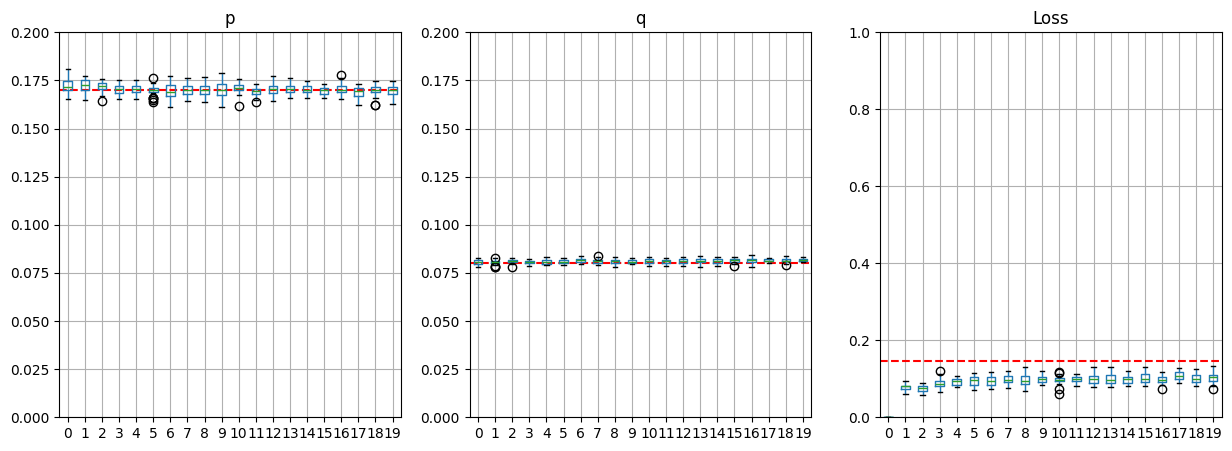

Alpha:  0.05


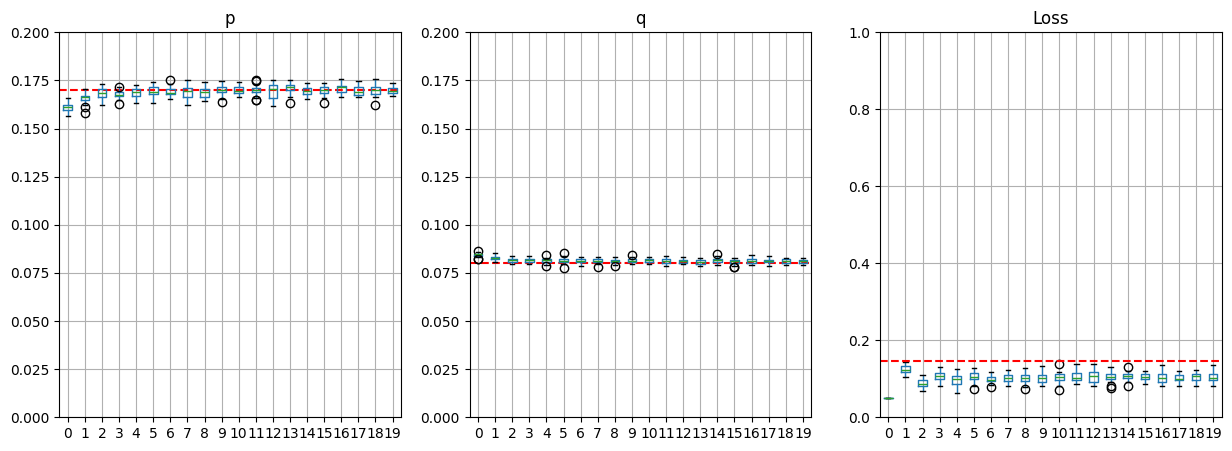

Alpha:  0.1


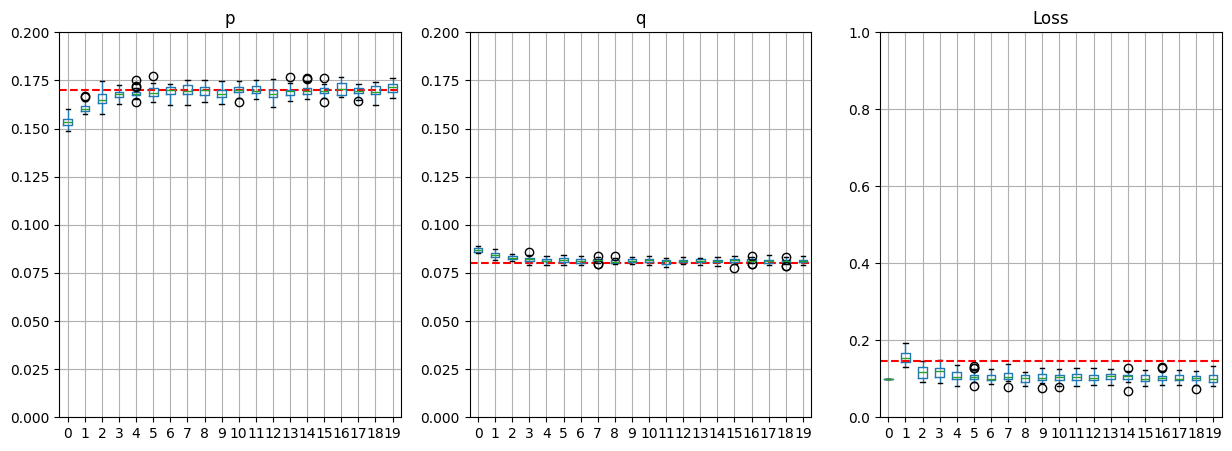

Alpha:  0.15000000000000002


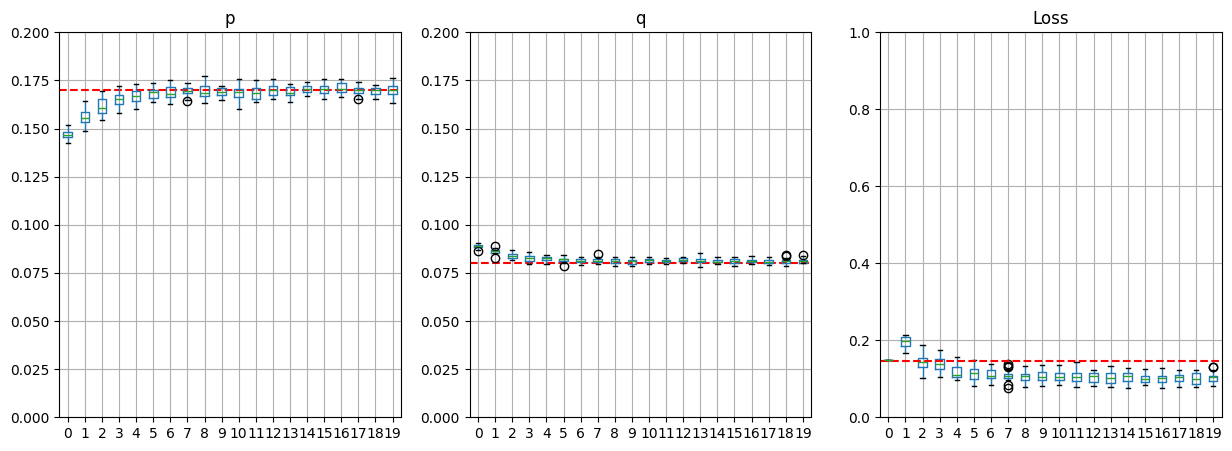

Alpha:  0.2


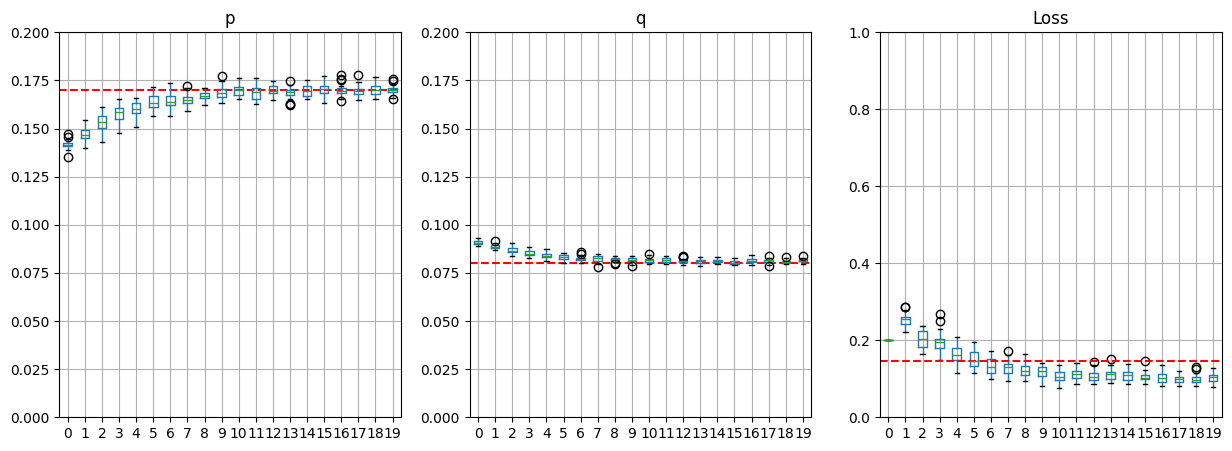

Alpha:  0.25


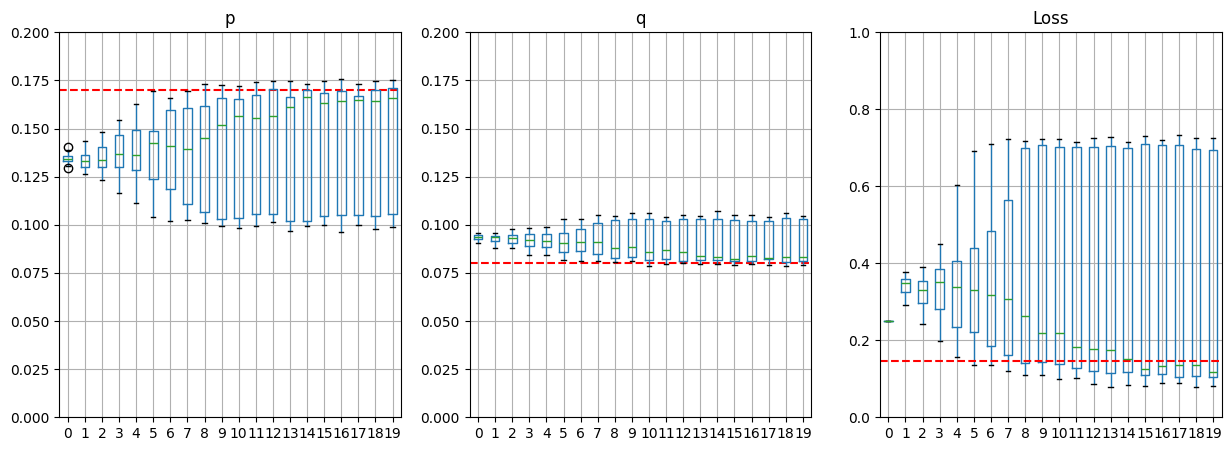

Alpha:  0.30000000000000004


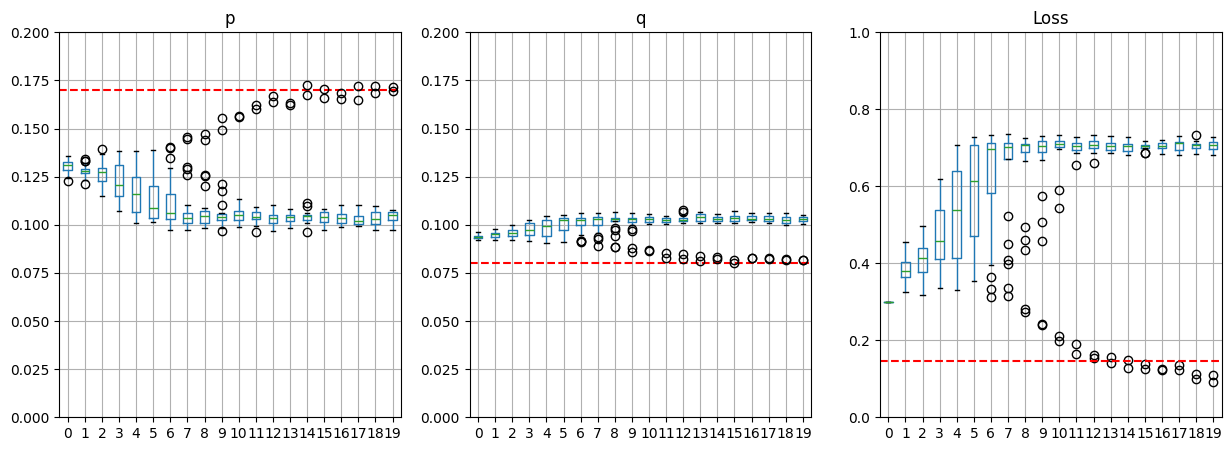

Alpha:  0.35000000000000003


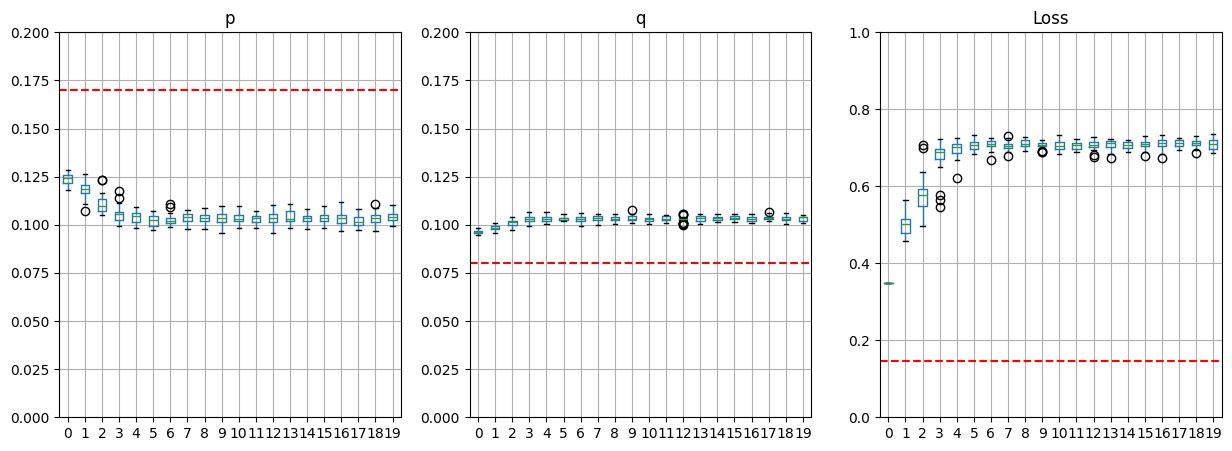

Alpha:  0.4


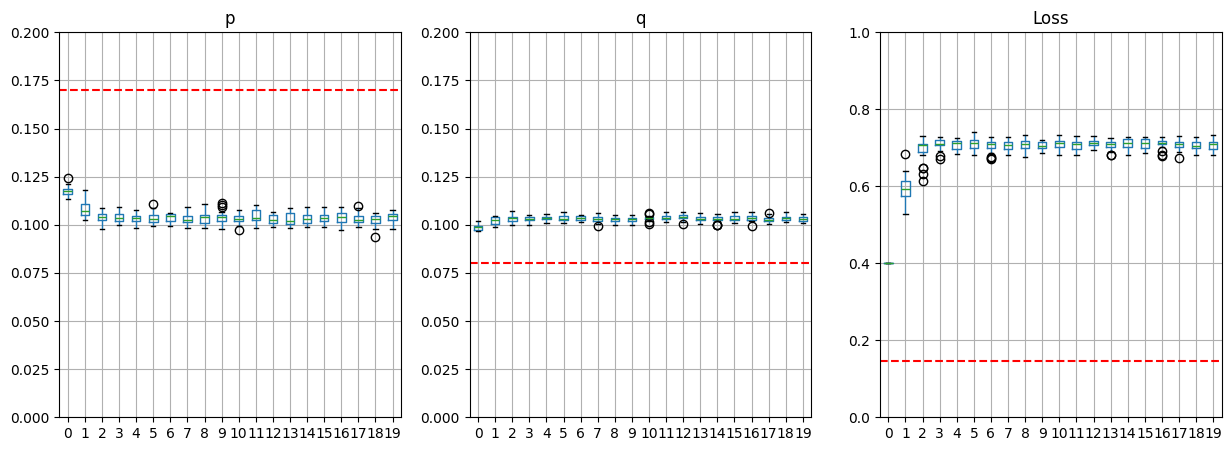

Alpha:  0.45


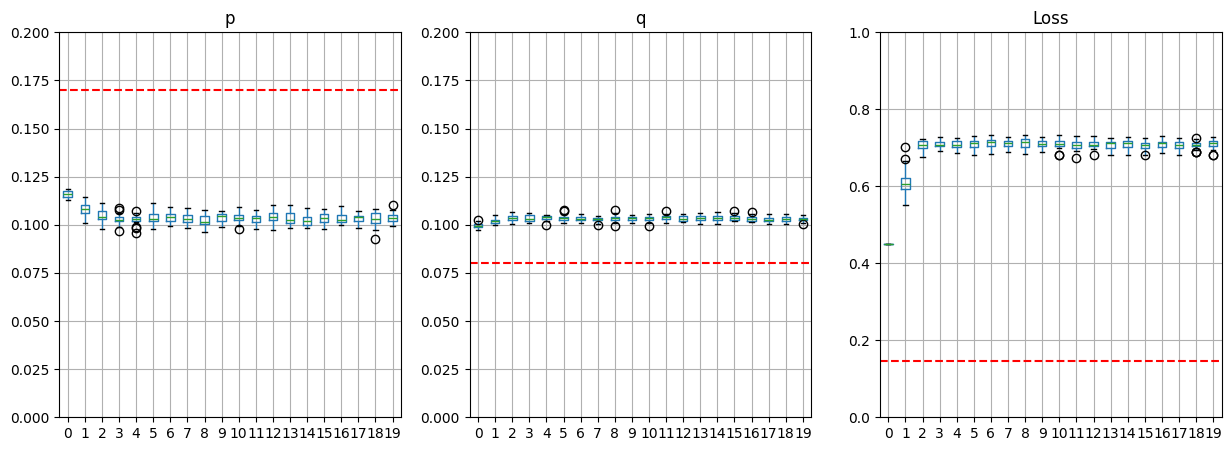

Alpha:  0.5


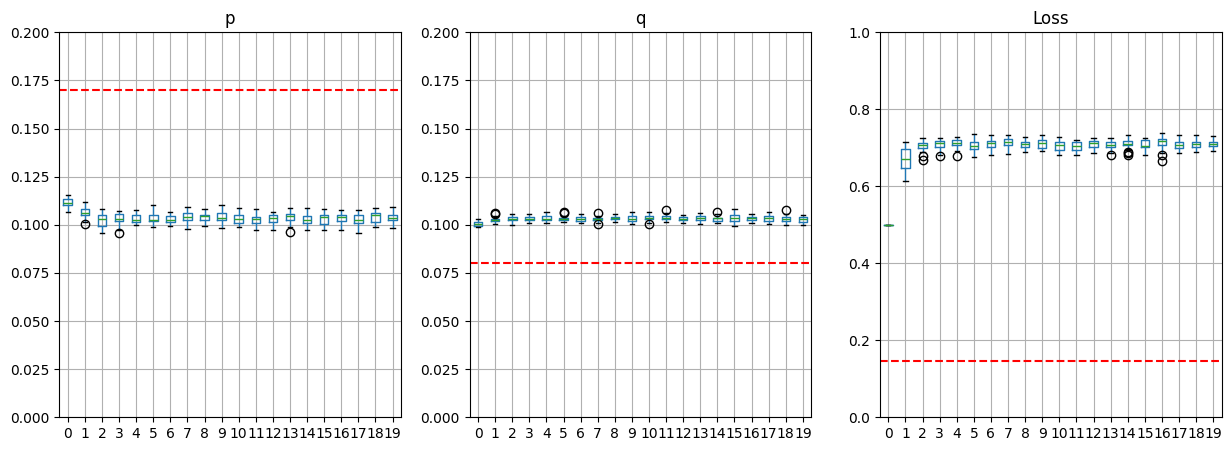

In [10]:
y_lim = 0.20
pic = False

for a in range(len(alpha_values)):
    df_p = pd.DataFrame(p_list[a])
    df_q = pd.DataFrame(q_list[a])
    df_loss = pd.DataFrame(loss_list_batched[a])
    alpha = alpha_values[a]
    print("Alpha: ", alpha)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title("p")
    plt.axhline(y=p, color='r', linestyle='--')
    df_p.boxplot()
    plt.ylim(0, y_lim)
    plt.subplot(1,3,2)
    plt.title("q")
    plt.axhline(y=q, color='r', linestyle='--')
    df_q.boxplot()
    plt.ylim(0, y_lim)
    plt.subplot(1,3,3)
    plt.title("Loss")
    df_loss.boxplot()
    plt.ylim(0, 1)
    plt.axhline(y=theoretical_threshold, color='r', linestyle='--')

    
    if pic: plt.savefig(f'div/det_alpha_{alpha}_r_{r}_steps_{steps}.png')

    plt.show()

When the algorithm does not converge to the proper solution, it always displays the same behaviour.

It looks like it finds a different stationary distribution that is not the desired one.

Our guess is that this distribution is the prior one.

In [25]:
# define the priors
pi_pri_list = []

pi_pri1 = np.ones((n,k)) / k
pi_pri_list.append(pi_pri1)

row = [0.70, 0.10, 0.10, 0.10]
pi_pri2 = np.zeros((n,k))
for i in range(n):
    pi_pri2[i, :] = row
pi_pri_list.append(pi_pri2)

row = [0.40, 0.40, 0.10, 0.10]
pi_pri3 = np.zeros((n,k))
for i in range(n):
    pi_pri3[i, :] = row
pi_pri_list.append(pi_pri3)

row = [0.30, 0.30, 0.30, 0.10]
pi_pri4 = np.zeros((n,k))
for i in range(n):
    pi_pri4[i, :] = row
pi_pri_list.append(pi_pri4)

row = [0.4, 0.3, 0.2, 0.1]
pi_pri5 = np.zeros((n,k))
for i in range(n):
    pi_pri5[i, :] = row
pi_pri_list.append(pi_pri5)


In [26]:
# run the samplers r times for each prior, for steps iterations

r = 20 # number of iterations for each value of alpha in the mesh
steps = 20 #iterations of the batched sampler
alpha = 0.4 #big enough to ensure the "divergence phenomenon"
burn_in = 5
# pi_pri_list

In [27]:
z_list_list = np.zeros((len(pi_pri_list), r, steps-burn_in, n))

In [28]:
for i in range(len(pi_pri_list)):
    pi_pri = pi_pri_list[i]
    print("Current prior: ", pi_pri[0,:])
    z_0 = warm_initializer(z_true, alpha, n ,k)

    # Run the sampler r times steps iterations
    for run in range(r):
        # print("Current run: ", run)

        batched = batched_Gibbs_sampler(A, z_0,
                                        alpha_p_pri, beta_p_pri, 
                                        alpha_q_pri, beta_q_pri, 
                                        pi_pri
                                        )
        batched.run(steps, burn_in = burn_in)
        z_list_batched = batched.get_z_list()[1:] #remove the starting point
        z_list_list[i, run, :, :] = z_list_batched

Current prior:  [0.25 0.25 0.25 0.25]


100%|██████████| 20/20 [00:00<00:00, 110.01it/s]


Current prior:  [0.7 0.1 0.1 0.1]


100%|██████████| 20/20 [00:00<00:00, 115.38it/s]


Current prior:  [0.4 0.4 0.1 0.1]


100%|██████████| 20/20 [00:00<00:00, 158.93it/s]


Current prior:  [0.3 0.3 0.3 0.1]


100%|██████████| 20/20 [00:00<00:00, 132.68it/s]


Current prior:  [0.4 0.3 0.2 0.1]


100%|██████████| 20/20 [00:00<00:00, 115.61it/s]


In [29]:
# counts?
counts = np.zeros((len(pi_pri_list), r, steps-burn_in, k))
for i in range(len(pi_pri_list)):
    for run in range(r):
        for step in range(steps-burn_in):
            z = z_list_list[i, run, step, :]
            for c in range(k):
                counts[i, run, step, c] = np.sum(z == c)

counts = counts / n


Prior:  [0.25 0.25 0.25 0.25]


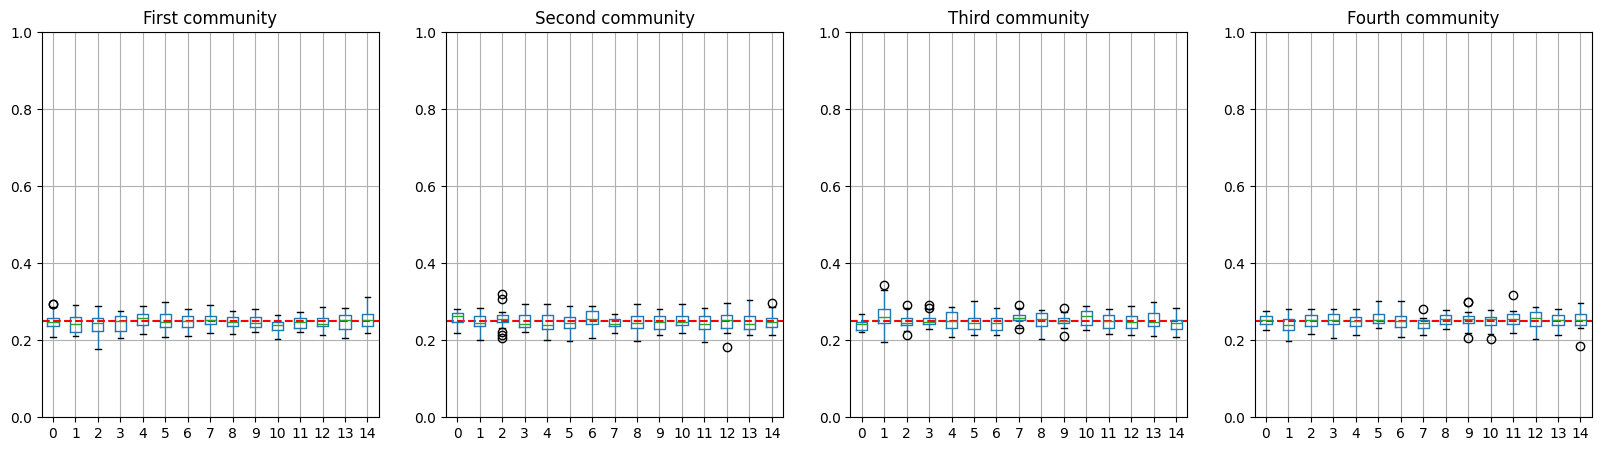

Prior:  [0.7 0.1 0.1 0.1]


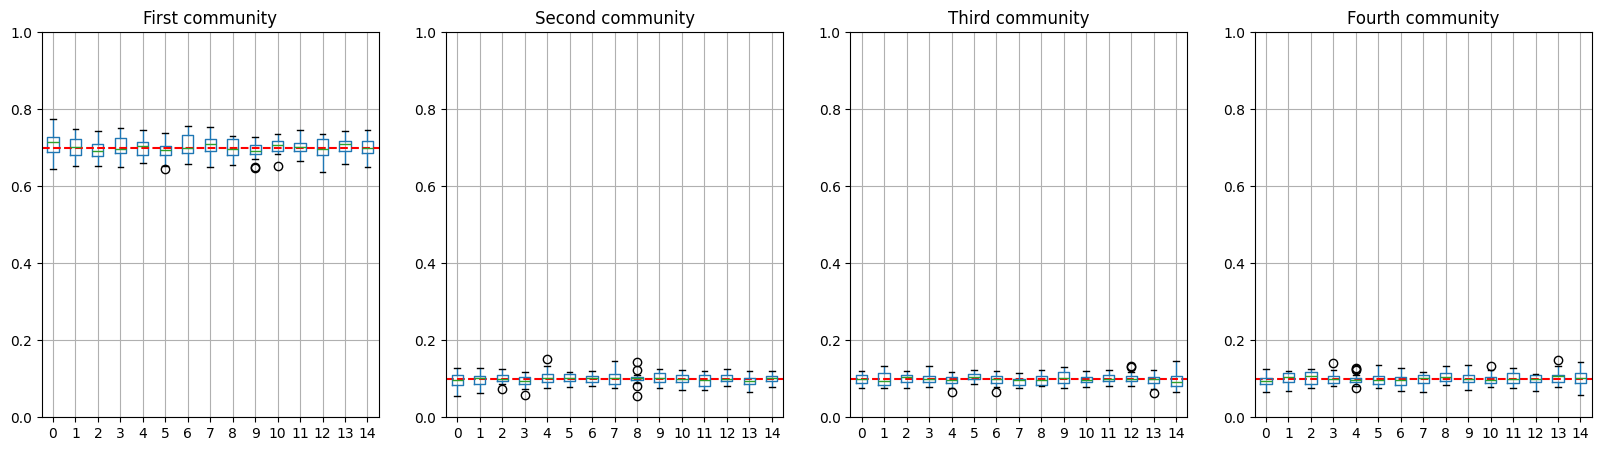

Prior:  [0.4 0.4 0.1 0.1]


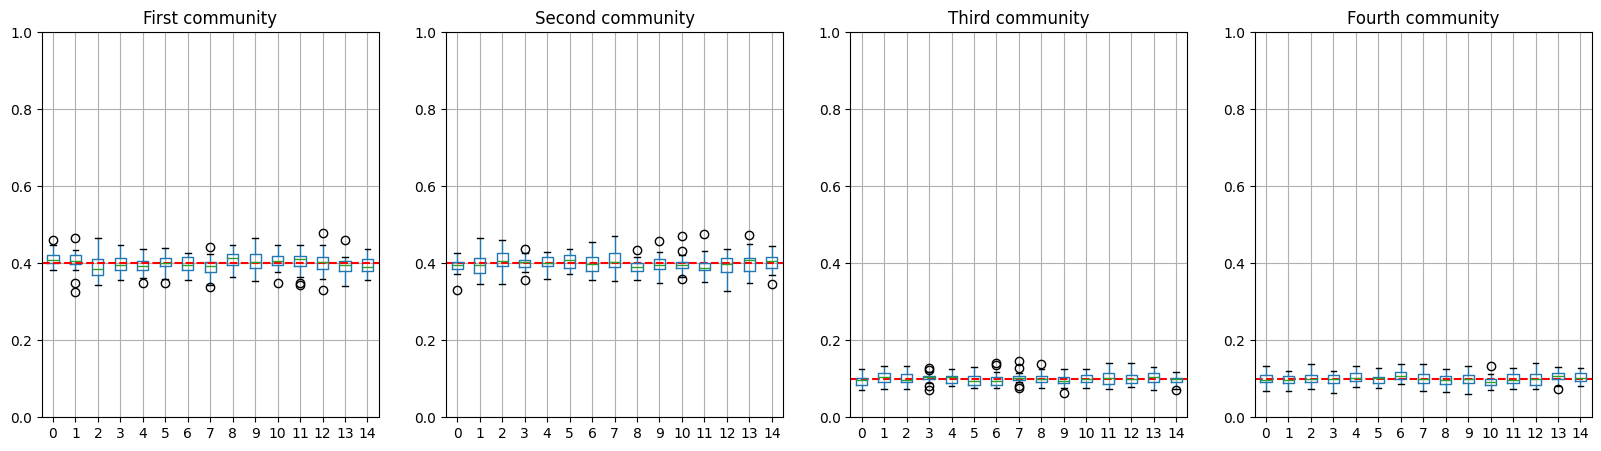

Prior:  [0.3 0.3 0.3 0.1]


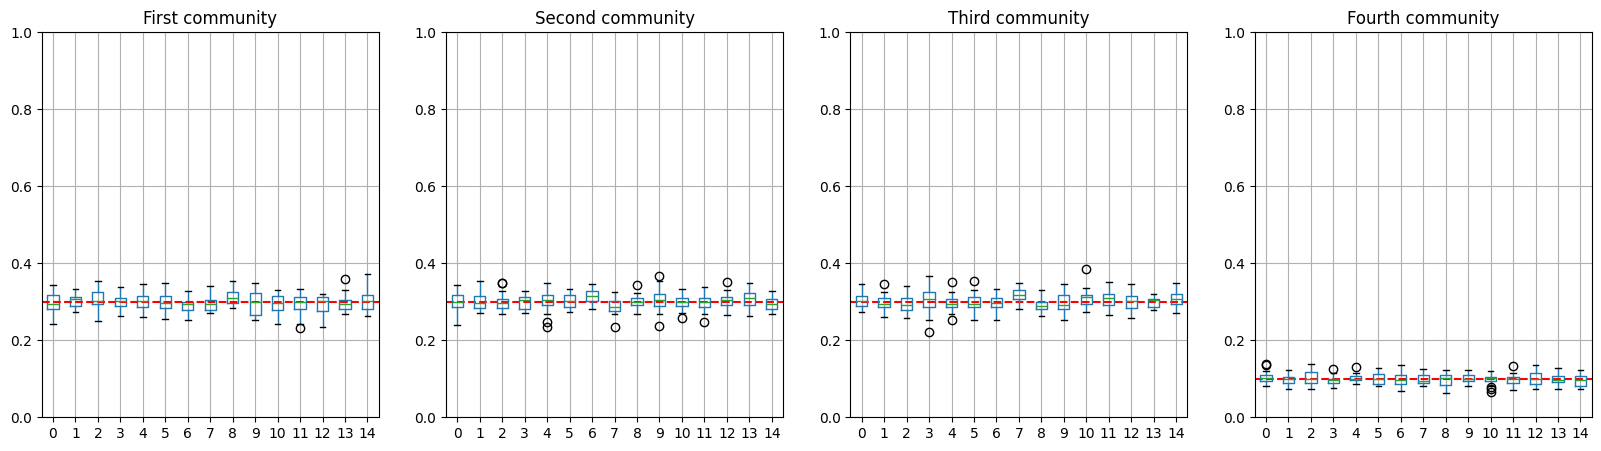

Prior:  [0.4 0.3 0.2 0.1]


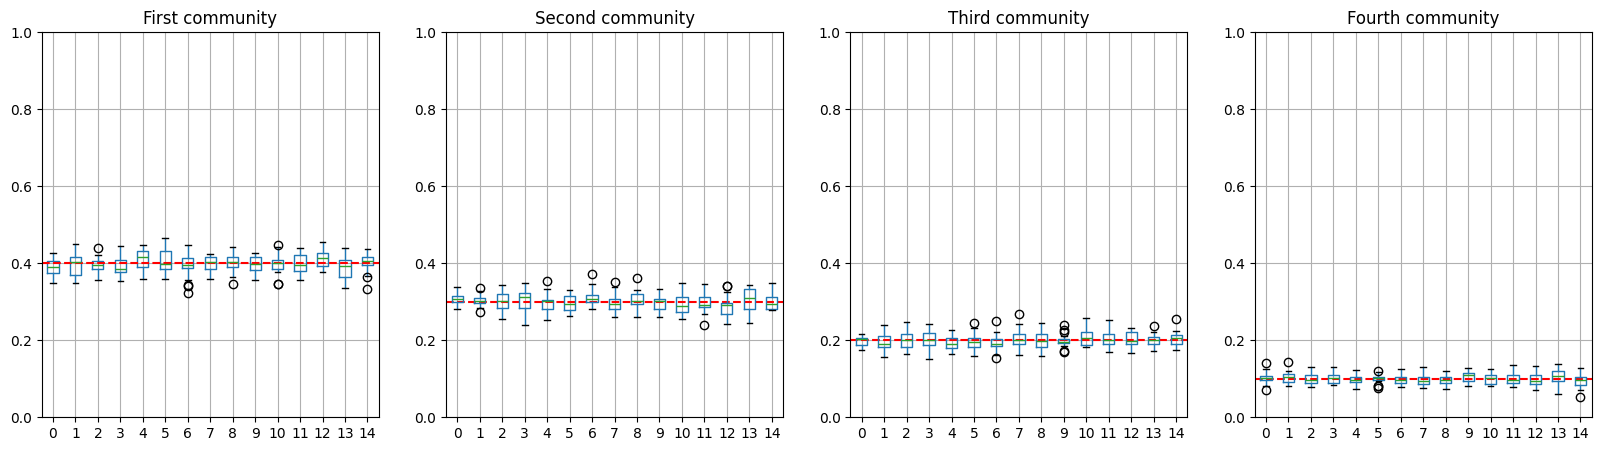

In [30]:
# plot boxplots of community counts (three for each line for commmuinities 1,2,3; while 4 can be inferred)
y_lim = 1
pic = True

for i in range(len(pi_pri_list)):

    df_1 = pd.DataFrame(counts[i, :, :, 0])
    df_2 = pd.DataFrame(counts[i, :, :, 1])
    df_3 = pd.DataFrame(counts[i, :, :, 2])
    df_4 = pd.DataFrame(counts[i, :, :, 3])

    pi_pri = pi_pri_list[i][0, :]
    print("Prior: ", pi_pri)

    plt.figure(figsize=(20, 5))

    plt.subplot(1,4,1)
    plt.title("First community")
    df_1.boxplot()
    # add the horizontal line for the prior
    plt.axhline(y=pi_pri[0], color='r', linestyle='--')
    plt.ylim(0, y_lim)

    plt.subplot(1,4,2)
    plt.title("Second community")
    plt.axhline(y=pi_pri[1], color='r', linestyle='--')
    df_2.boxplot()
    plt.ylim(0, y_lim)

    plt.subplot(1,4,3)
    plt.title("Third community")
    plt.axhline(y=pi_pri[2], color='r', linestyle='--')
    df_3.boxplot()
    plt.ylim(0, y_lim)

    plt.subplot(1,4,4)
    plt.title("Fourth community")
    plt.axhline(y=pi_pri[3], color='r', linestyle='--')
    df_4.boxplot()
    plt.ylim(0, y_lim)
        
    if pic: plt.savefig(f'prior/prior_{pi_pri}.png')

    plt.show()

We can also compute the entropy and compare the entropy of the true assignments and the obtained ones, as a more effective univariate summary of the convergence.

True entropy:  1.9977348141748612
Prior:  [0.7 0.1 0.1 0.1]


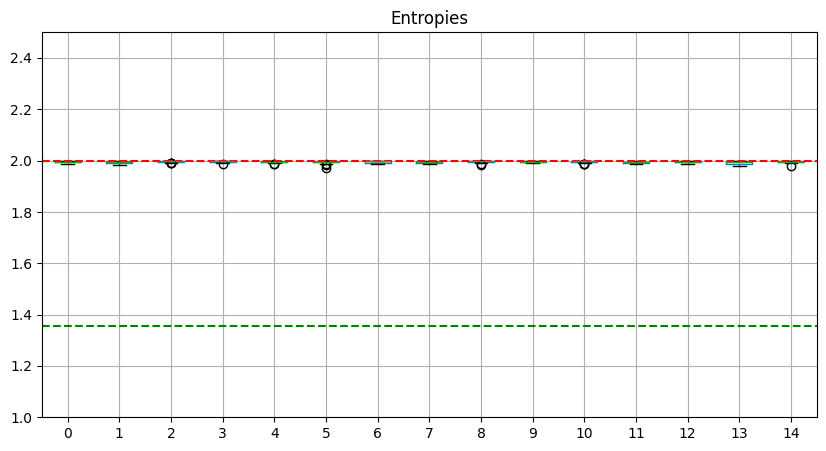

Prior:  [0.4 0.4 0.1 0.1]


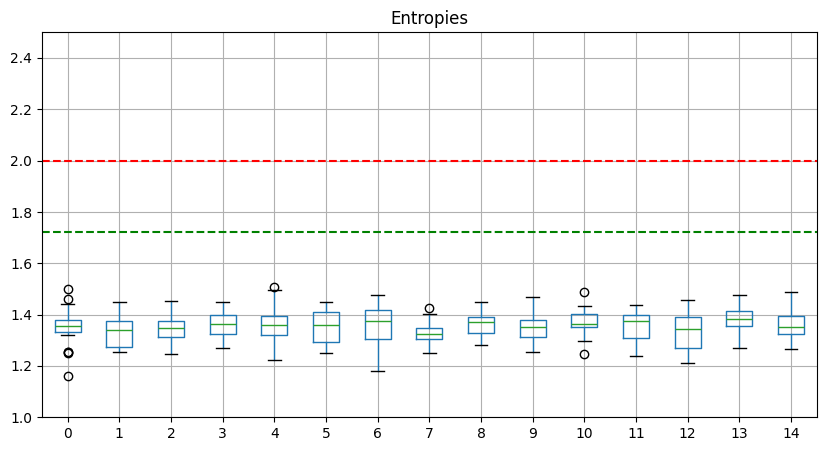

Prior:  [0.3 0.3 0.3 0.1]


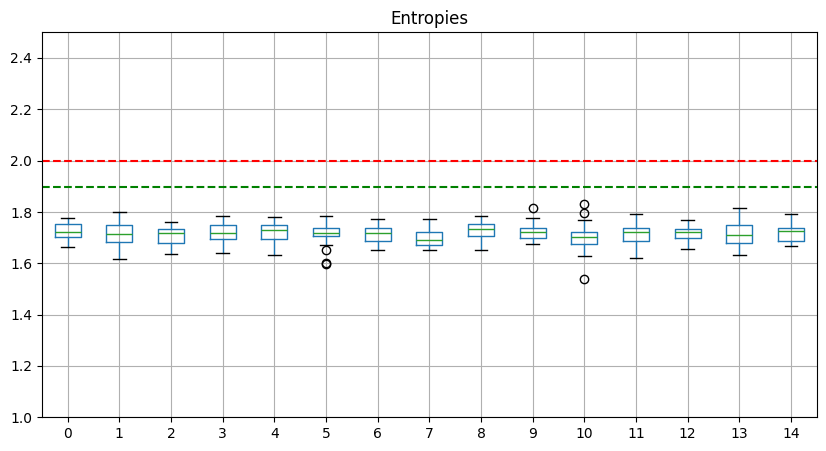

Prior:  [0.4 0.3 0.2 0.1]


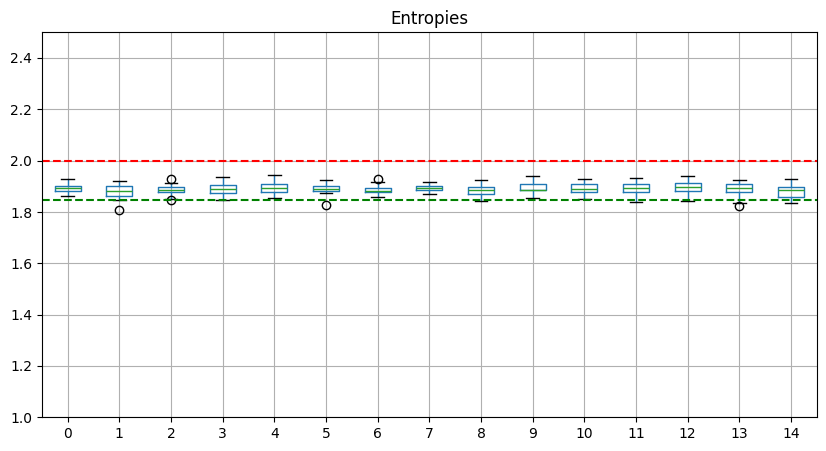

Prior:  [0.7 0.1 0.1 0.1]
Prior:  [0.4 0.4 0.1 0.1]
Prior:  [0.3 0.3 0.3 0.1]
Prior:  [0.4 0.3 0.2 0.1]


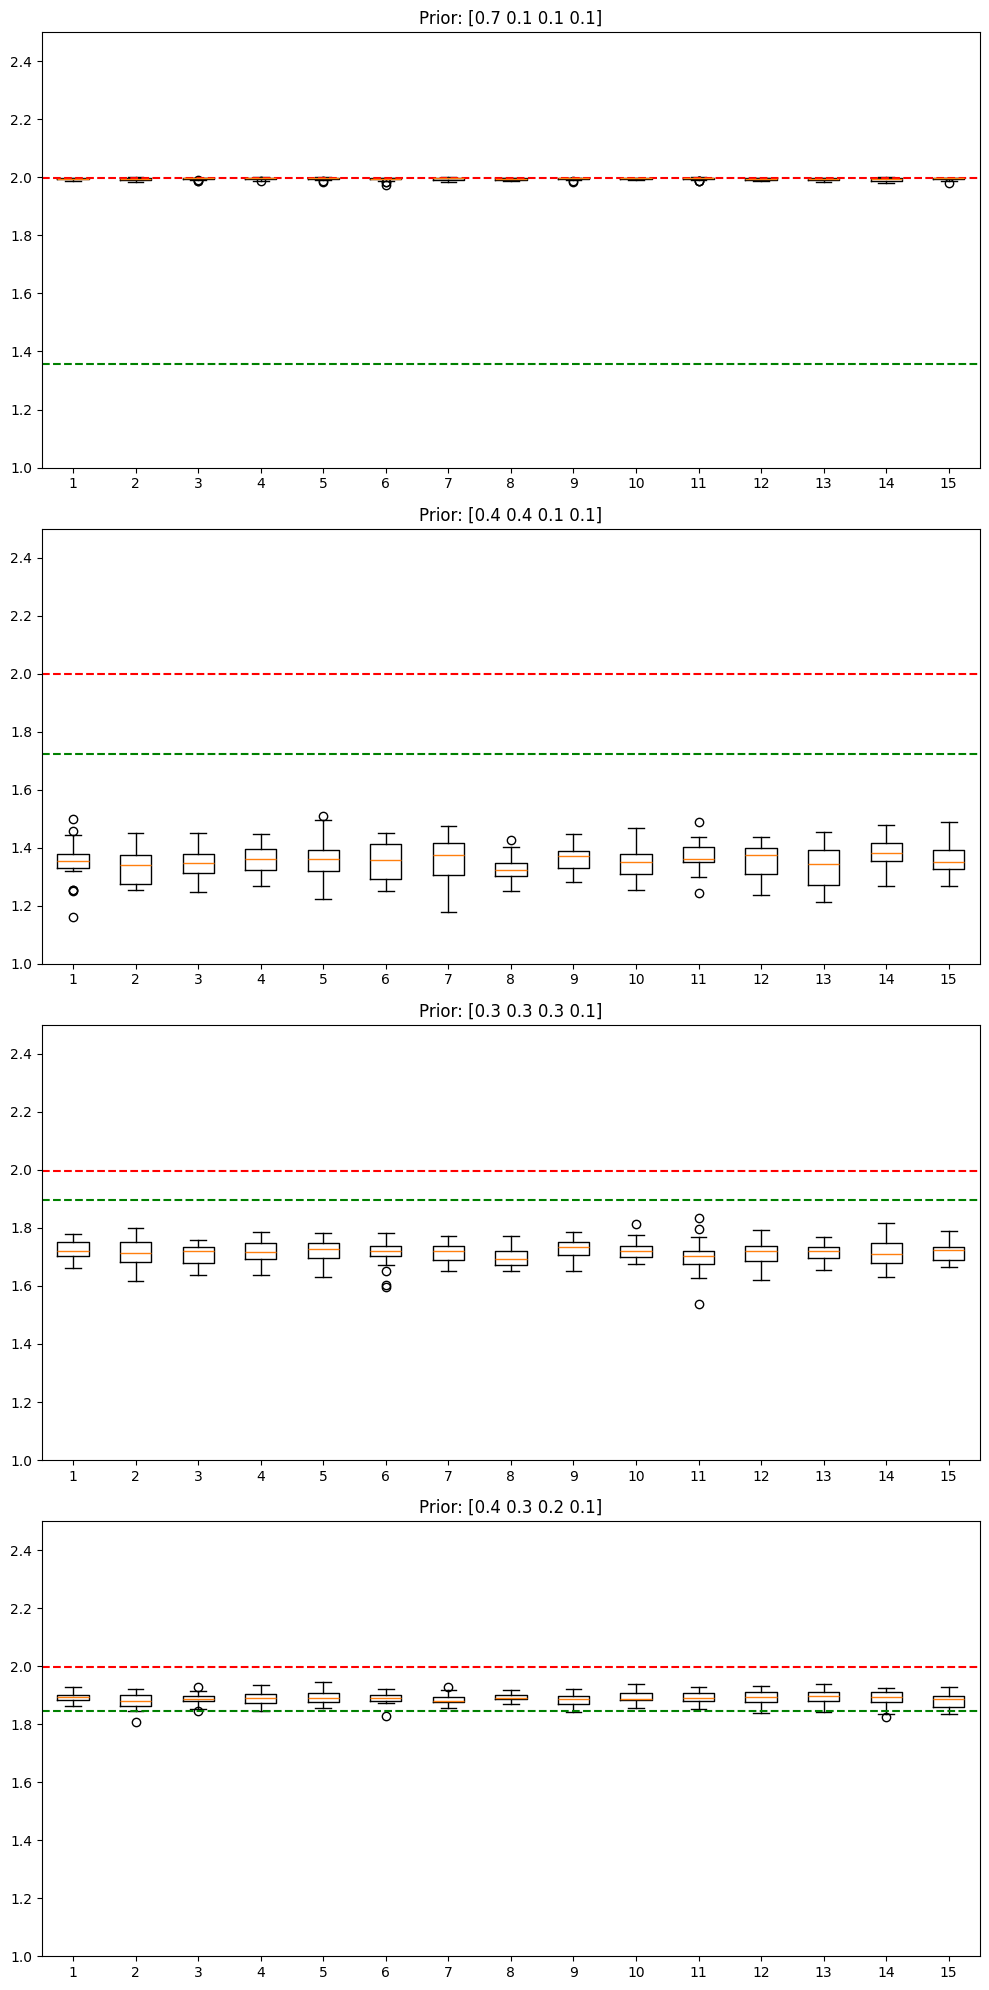

In [24]:
from math import log2 as log2
true_entropy = entropy(z_true)
print("True entropy: ", true_entropy)

# compute the entropy for each run and each prior
entropies = np.zeros((len(pi_pri_list), r, steps-burn_in))
for i in range(len(pi_pri_list)):
    for run in range(r):
        for step in range(steps-burn_in):
            z = z_list_list[i, run, step, :]
            entropies[i, run, step] = entropy(z)

# plot the boxplots of the entropies
y_lower = 1
y_upper = 2.5
pic = True

for i in range(len(pi_pri_list)):
    df = pd.DataFrame(entropies[i, :, :])
    pi_pri = pi_pri_list[i][0, :]
    print("Prior: ", pi_pri)

    # compute the prior entropy, so the entropy of the prior distribution
    # to do so, since the prior contains proportions of the communities,
    # we can compute the entropy of the prior distribution as the "entropy of the proportions"
    prior_entropy = -sum([pi_pri[c] * log2(pi_pri[c]) for c in range(k)])

    plt.figure(figsize=(10, 5))
    plt.title("Entropies")
    df.boxplot()
    plt.ylim(y_lower, y_upper)
    plt.axhline(y=true_entropy, color='r', linestyle='--')
    plt.axhline(y=prior_entropy, color='g', linestyle='--')
        
    if pic: plt.savefig(f'prior/entropy_prior{pi_pri}.png')

    plt.show()

fig, axs = plt.subplots(len(pi_pri_list), 1, figsize=(10, 5*len(pi_pri_list)))

for i in range(len(pi_pri_list)):
    df = pd.DataFrame(entropies[i, :, :])
    pi_pri = pi_pri_list[i][0, :]
    print("Prior: ", pi_pri)

    # compute the prior entropy, so the entropy of the prior distribution
    # to do so, since the prior contains proportions of the communities,
    # we can compute the entropy of the prior distribution as the "entropy of the proportions"
    prior_entropy = -sum([pi_pri[c] * log2(pi_pri[c]) for c in range(k)])

    axs[i].boxplot(df.values)
    axs[i].set_ylim(y_lower, y_upper)
    axs[i].axhline(y=true_entropy, color='r', linestyle='--')
    axs[i].axhline(y=prior_entropy, color='g', linestyle='--')
    axs[i].set_title("Prior: " + str(pi_pri))

plt.tight_layout()
if pic: plt.savefig(f'prior/entropies.png')
plt.show()




We observe a very similar phenomenon if we use an asymmetric Dirichlet prior on $\pi$, very concentrated around the mean.

Of course, it becomes less immediate to notice using counts in the case of the Dirichlet prior for the Neal algorithm, but we can still rely on the entropy to verify it. Entropy is still a reliable metric in the case of a symmetric dirichlet prior.

In [100]:
gamma_list = []
gamma1 = [1,1,1,1]
gamma_list.append(gamma1)

gamma2 = [10,1,1,1]
gamma_list.append(gamma2)

gamma3 = [5,5,1,1]
gamma_list.append(gamma3)

In [101]:
# run the samplers r times for each prior, for steps iterations

r = 20 # number of iterations for each value of alpha in the mesh
steps = 20 #iterations of the batched sampler
alpha = 0.4 #big enough to ensure the "divergence phenomenon"
burn_in = 5
# pi_pri_list

In [102]:
z_list_list = np.zeros((len(gamma_list), r, steps-burn_in, n))

In [ ]:
for i in range(len(gamma_list)):
    gamma = gamma_list[i]
    print("Current prior: ", gamma)
    z_0 = warm_initializer(z_true, alpha, n ,k)

    # Run the sampler r times steps iterations
    for run in range(r):
        # print("Current run: ", run)

        batched = Neal_batched_Gibbs_sampler(A, z_0,
                                        alpha_p_pri, beta_p_pri, 
                                        alpha_q_pri, beta_q_pri, 
                                        gamma=gamma
                                        )
        batched.run(steps, burn_in = burn_in)
        z_list_batched = batched.get_z_list()[1:] #remove the starting point
        z_list_list[i, run, :, :] = z_list_batched

True entropy:  1.9977348141748612
Prior:  [1 1 1 1]


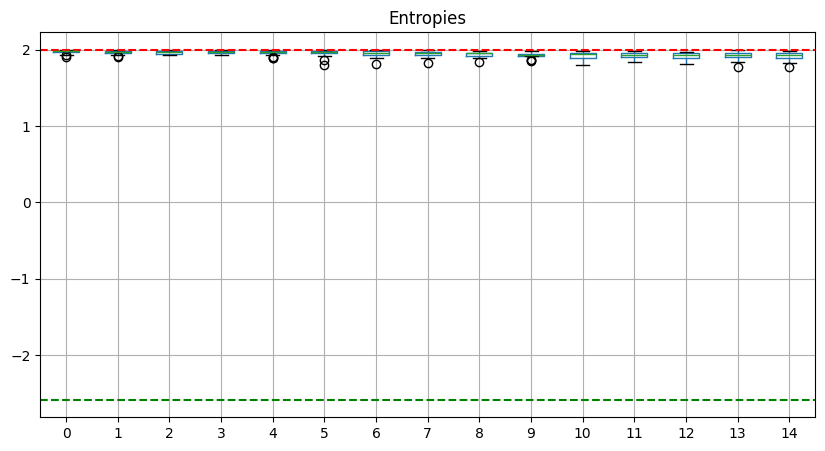

Prior:  [10  1  1  1]


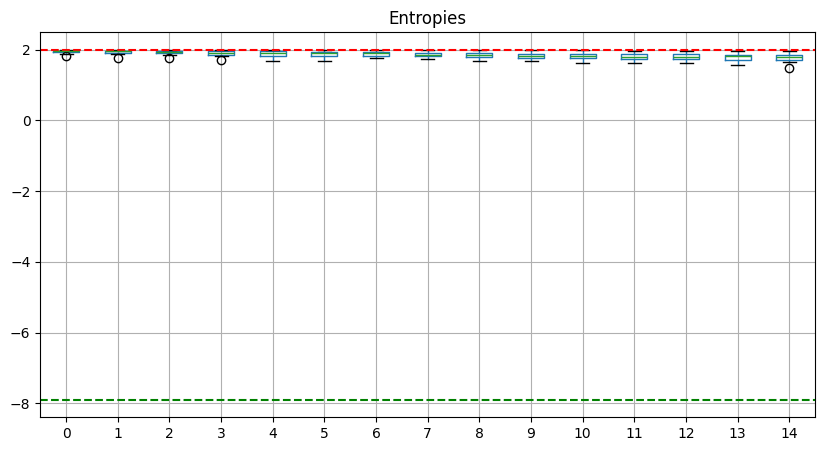

Prior:  [5 5 1 1]


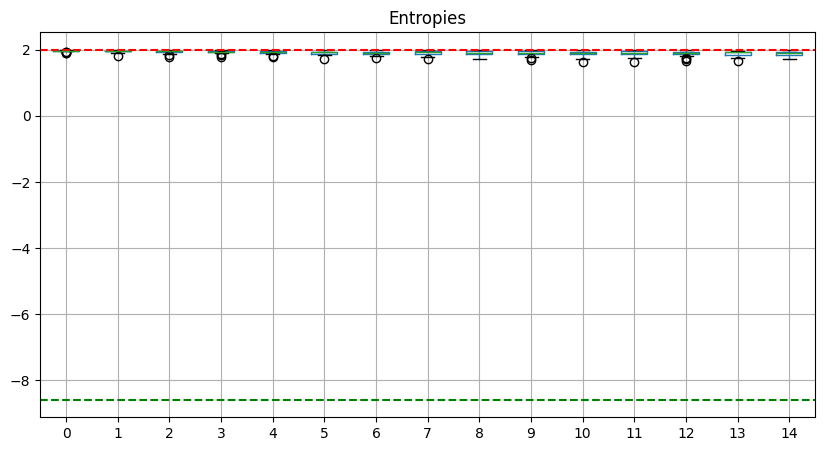

In [104]:
from math import log2 as log2
from scipy.special import gamma as fgamma
from scipy.special import digamma
true_entropy = entropy(z_true)
print("True entropy: ", true_entropy)

# compute the entropy for each run and each prior
entropies = np.zeros((len(gamma_list), r, steps-burn_in))
for i in range(len(gamma_list)):
    for run in range(r):
        for step in range(steps-burn_in):
            z = z_list_list[i, run, step, :]
            entropies[i, run, step] = entropy(z)

# plot the boxplots of the entropies
# y_lower = 1.5
# y_upper = 2.5
pic = False

for i in range(len(gamma_list)):
    df = pd.DataFrame(entropies[i, :, :])
    gamma = np.array(gamma_list[i])
    print("Prior: ", gamma)

    # formula for prior entropy of a Dirichlet distribution
    gamma_0 = sum(gamma)
    prior_entropy = log2(np.prod(fgamma(gamma))/fgamma(gamma_0))
    prior_entropy += (gamma_0 - k) * digamma(gamma_0)
    prior_entropy -= sum((gamma - 1) * digamma(gamma))

    plt.figure(figsize=(10, 5))
    plt.title("Entropies")
    df.boxplot()
    # plt.ylim(y_lower, y_upper)
    plt.axhline(y=true_entropy, color='r', linestyle='--')
    plt.axhline(y=prior_entropy, color='g', linestyle='--')
        
    if pic: plt.savefig(f'entropy_Neal_alpha_{alpha}_r_{r}_steps_{steps}.png')

    plt.show()


100%|██████████| 50/50 [00:00<00:00, 125.49it/s]


Prior:  [100  50  10  10]


(0.0, 1.0)

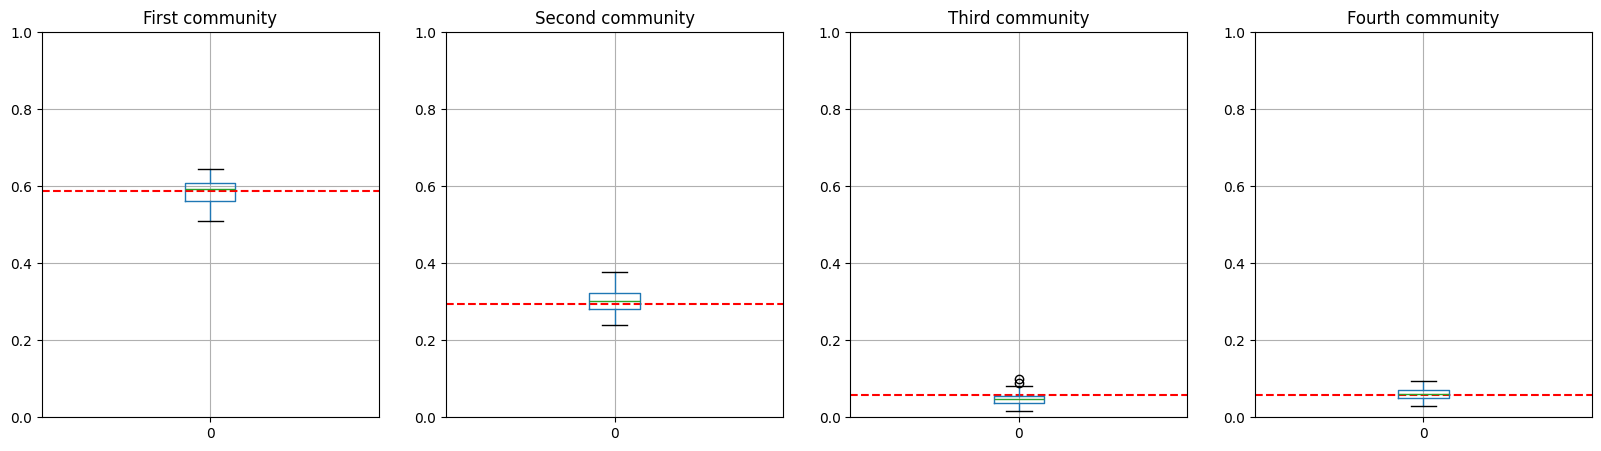

In [106]:
gamma = [100,50,10,10]

# run the sampler steps iteration, obtain community counts and plot them
steps = 50
burn_in = 5
batched = Neal_batched_Gibbs_sampler(A, z_0,
                                    alpha_p_pri, beta_p_pri, 
                                    alpha_q_pri, beta_q_pri, 
                                    gamma=gamma
                                    )

batched.run(steps, burn_in = burn_in)
z_list_batched = batched.get_z_list()[1:] #remove the starting point

# counts?
counts = np.zeros((steps-burn_in, k))
for step in range(steps-burn_in):
    z = z_list_batched[step]
    for c in range(k):
        counts[step, c] = np.sum(z == c)

counts = counts / n

# plot boxplots of community counts (three for each line for commmuinities 1,2,3; while 4 can be inferred)
y_lim = 1
pic = False

df_1 = pd.DataFrame(counts[:, 0])
df_2 = pd.DataFrame(counts[:, 1])
df_3 = pd.DataFrame(counts[:, 2])
df_4 = pd.DataFrame(counts[:, 3])

gamma = np.array(gamma)
print("Prior: ", gamma)

plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
plt.title("First community")
df_1.boxplot()
# add the horizontal line for the prior
plt.axhline(y=gamma[0]/sum(gamma), color='r', linestyle='--')
plt.ylim(0, y_lim)

plt.subplot(1,4,2)
plt.title("Second community")
plt.axhline(y=gamma[1]/sum(gamma), color='r', linestyle='--')
df_2.boxplot()
plt.ylim(0, y_lim)

plt.subplot(1,4,3)
plt.title("Third community")
plt.axhline(y=gamma[2]/sum(gamma), color='r', linestyle='--')
df_3.boxplot()
plt.ylim(0, y_lim)

plt.subplot(1,4,4)
plt.title("Fourth community")
plt.axhline(y=gamma[3]/sum(gamma), color='r', linestyle='--')
df_4.boxplot()
plt.ylim(0, y_lim)



Prior:  [100  50  10  10]


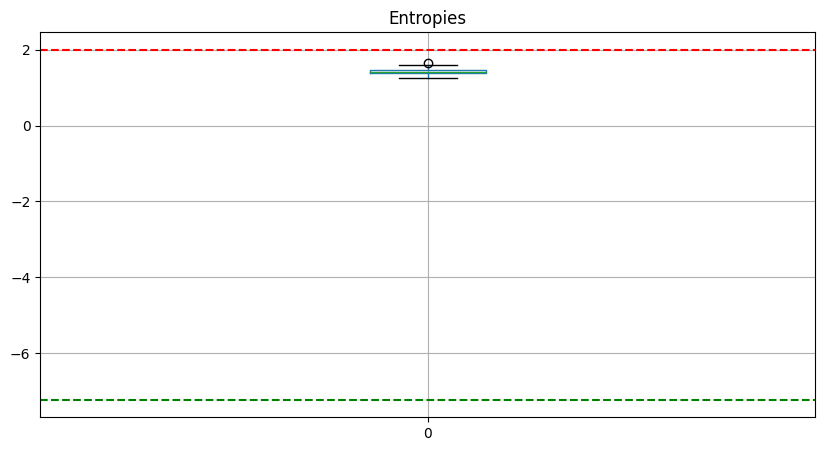

In [111]:
from math import log10
# empirical entrpy in this case
entropies = np.zeros(steps-burn_in)
for step in range(steps-burn_in):
    z = z_list_batched[step]
    entropies[step] = entropy(z)

# plot the boxplots of the entropies

df = pd.DataFrame(entropies)
print("Prior: ", gamma)

# formula for prior entropy of a Dirichlet distribution
gamma_0 = sum(gamma)
prior_entropy = np.log(np.prod(fgamma(gamma))/fgamma(gamma_0))
prior_entropy += (gamma_0 - k) * digamma(gamma_0)
prior_entropy -= sum((gamma - 1) * digamma(gamma))

plt.figure(figsize=(10, 5))
plt.title("Entropies")
df.boxplot()
# plt.ylim(y_lower, y_upper)
plt.axhline(y=true_entropy, color='r', linestyle='--')
plt.axhline(y=prior_entropy, color='g', linestyle='--')

plt.show()


# EXTRA: 
spectral clustering to verify if the accuracy is enough to ensure convergence

In [58]:
p = 0.17
q = 0.08
n = 400
k = 4
n_k = n/k
T = 500
burn_in = 0

# I = -2 * np.log((p*q)**0.5 +((1-p)* (1-q))**0.5 )
# theoretical_threshold = np.exp(-n*I / k) # for later use
# generate the network
sbm = Homogeneous_SBM(n, k, p, q, Neal=False)
A = sbm.get_A()
z_true = sbm.get_z()

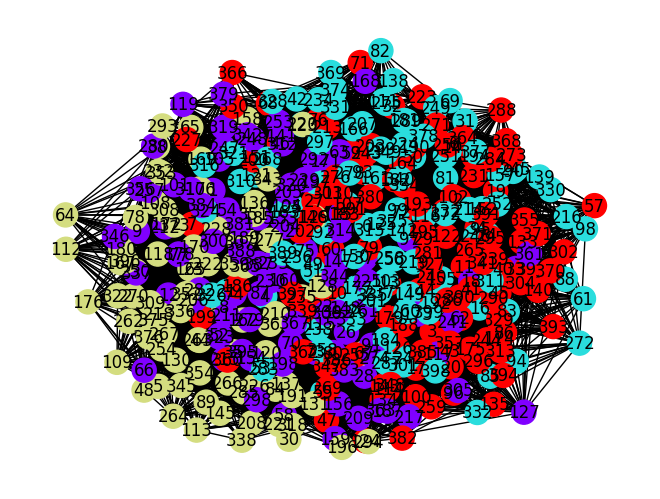

Node 0: Community 1
Node 1: Community 0
Node 2: Community 3
Node 3: Community 3
Node 4: Community 1
Node 5: Community 2
Node 6: Community 1
Node 7: Community 3
Node 8: Community 2
Node 9: Community 0
Node 10: Community 3
Node 11: Community 3
Node 12: Community 0
Node 13: Community 3
Node 14: Community 1
Node 15: Community 0
Node 16: Community 1
Node 17: Community 3
Node 18: Community 0
Node 19: Community 3
Node 20: Community 3
Node 21: Community 1
Node 22: Community 3
Node 23: Community 2
Node 24: Community 1
Node 25: Community 1
Node 26: Community 0
Node 27: Community 3
Node 28: Community 0
Node 29: Community 3
Node 30: Community 2
Node 31: Community 1
Node 32: Community 3
Node 33: Community 0
Node 34: Community 3
Node 35: Community 2
Node 36: Community 2
Node 37: Community 0
Node 38: Community 2
Node 39: Community 3
Node 40: Community 3
Node 41: Community 3
Node 42: Community 1
Node 43: Community 3
Node 44: Community 2
Node 45: Community 3
Node 46: Community 3
Node 47: Community 3
No

In [59]:
# libraries
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Create a graph
G = nx.from_numpy_array(A)

# Perform spectral clustering
n_clusters = 4  # Number of communities to detect
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans')
labels = spectral.fit_predict(A)

# Add the community labels to the graph nodes
for node, label in zip(G.nodes(), labels):
    G.nodes[node]['community'] = label

# Draw the graph with node colors representing communities
pos = nx.spring_layout(G)  # Position nodes using the spring layout
colors = [G.nodes[node]['community'] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow)
plt.show()

# Print the community labels for each node
for node, label in zip(G.nodes(), labels):
    print(f"Node {node}: Community {label}")

In [61]:
# turn the labels into a numpy array
z = np.array(labels)

# compute the loss
loss(z_true, z)

(0.145, (3, 2, 1, 0))

100%|██████████| 100/100 [00:00<00:00, 121.46it/s]


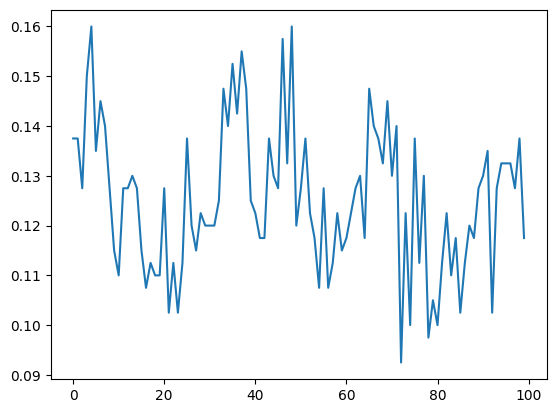

In [62]:
# run a few iterations of the batched sampler
steps = 100
burn_in = 0
batched = Neal_batched_Gibbs_sampler(A, z,
                                alpha_p_pri, beta_p_pri, 
                                alpha_q_pri, beta_q_pri, 
                                gamma=1
                                # pi_pri=np.ones((n,k)) / k
                                )

batched.run(steps, burn_in = burn_in)
z_list_batched = batched.get_z_list()[1:] #remove the starting point

# check loss
losses = [loss(z_true, z_list_batched[i])[0] for i in range(steps-burn_in)]
plt.plot(losses)
plt.show()

In [77]:
# for each node, take the majority vote of the communities in the last 50 iterations
z_majority = np.zeros(n)
for node in range(n): 
    communities = np.zeros(50, dtype=int)
    for i in range(50): 
        # select all the communities of the node in the last 50 iterations
        communities[i] = z_list_batched[-i][node]

    # take the majority vote
    z_majority[node] = np.argmax(np.bincount(communities))

z_majority = z_majority.astype(int)

# compute the loss
loss(z_true, z_majority)

(0.0875, (3, 2, 1, 0))